# Bank Account Fraud

1. Exploratory Data Analysis of Bank Account Applications
    1. Number of Transactions by Fraud Status
    2. Missing Values of Features by Fraud Status
    3. Distribution and Outliers of Features by Fraud Status
    <br/><br/>
2. Feature Engineering for Fraud Detection of Bank Account Applications
    1. One-Hot Encoding for Categorical Features
    2. Min-Max Scaling for Numerical Features
    <br/><br/>
3. Feature Selection for Fraud Detection of Bank Account Applications
    1. Variance Threshold Test for Constant Features
    2. Pearson Correlation Test for Multicollinearity
    3. Chi-Squared Test for Categorical Features
    4. Mutual Information Test for Numeric Features
    5. Extra Trees Classifier for Feature Selection
    <br/><br/>
4. Fraud Detection Model Training Functions using SMOTE and Grid Search CV
    <br/><br/>
5. Fraud Detection Model Testing Functions using Recall and ROC-AUC
    1. Classification Report for Model Testing
    2. Confusion Matrix for Model Testing
    3. Cross-Validation Results for Model Testing
    4. ROC-AUC for Model Testing
    <br/><br/>
6. Model Training -> Train-Test Split
    <br/><br/>
7. Pyspark Codes
    <br/><br/>
8. Codes without Pyspark Codes
    <br/><br/>
9. Lime Explainability
    <br/><br/>
10. Supporting Visualizations
    <br/><br/>

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib to display plots inline in the notebook
%matplotlib inline

In [3]:
# Increase the maximum number of columns displayed in Pandas to 200
pd.set_option('display.max_columns', 200)

# Set the default style of Matplotlib plots to "ggplot"
plt.style.use('ggplot')

In [4]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/Base.csv")

In [5]:
# Create a deep copy of the DataFrame
new_df = df.copy()

In [ ]:
# Get the number of rows and columns in the DataFrame
df_shape = df.shape
print("Number of rows:", df_shape[0])
print("Number of columns:", df_shape[1])

Number of rows: 33885
Number of columns: 32


In [ ]:
# Display the first 5 rows of the DataFrame
df.head()

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           1     0.9               0.166828                         -1   
1           1     0.9               0.296286                         -1   
2           1     0.9               0.044985                         -1   
3           1     0.9               0.159511                         -1   
4           1     0.9               0.596414                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            88            50            0.020925   
1                           144            50            0.005418   
2                           132            40            3.108549   
3                            22            50            0.019079   
4                           218            50            0.004441   

   intended_balcon_amount payment_type  zip_count_4w   velocity_6h  \
0               -1.331345           AA           769  10650.765523   
1               -0.816224           AB           366    534.047319   
2               -0.755728           AC           870   4048.534263   
3               -1.205124           AB           810   3457.064063   
4               -0.773276           AB           890   5020.341679   

   velocity_24h  velocity_4w  bank_branch_count_8w  \
0   3134.319630  3863.647740                     1   
1   2670.918292  3124.298166                   718   
2   2893.621498  3159.590679                     1   
3   4054.908412  3022.261812                  1921   
4   2728.237159  3087.670952                  1990   

   date_of_birth_distinct_emails_4w employment_status  credit_risk_score  \
0                                 6                CA                185   
1                                 3                CA                259   
2                                14                CB                177   
3                                 6                CA                110   
4                                 2                CA                295   

   email_is_free housing_status  phone_home_valid  phone_mobile_valid  \
0              0             BA                 1                   0   
1              1             BA                 0                   0   
2              1             BA                 0                   1   
3              1             BA                 0                   1   
4              1             BA                 1                   0   

   bank_months_count  has_other_cards  proposed_credit_limit  foreign_request  \
0                 24                0                  500.0              0.0   
1                 15                0                 1500.0              0.0   
2                 -1                0                  200.0              0.0   
3                 31                1                  200.0              0.0   
4                 31                0                 1500.0              0.0   

     source  session_length_in_minutes  device_os  keep_alive_session  \
0  INTERNET                   3.888115    windows                 0.0   
1  INTERNET                  31.798819    windows                 0.0   
2  INTERNET                   4.728705      other                 0.0   
3  INTERNET                   2.047904      linux                 0.0   
4  INTERNET                   3.775225  macintosh                 1.0   

   device_distinct_emails_8w  device_fraud_count  month  
0                        1.0                 0.0    7.0  
1                        1.0                 0.0    7.0  
2                        1.0                 0.0    7.0  
3                        1.0                 0.0    7.0  
4                        1.0                 0.0    7.0

# 1. Exploratory Data Analysis of Bank Account Applications

In [ ]:
# Display summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33885 entries, 0 to 33884
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fraud_bool                        33885 non-null  int64  
 1   income                            33885 non-null  float64
 2   name_email_similarity             33885 non-null  float64
 3   prev_address_months_count         33885 non-null  int64  
 4   current_address_months_count      33885 non-null  int64  
 5   customer_age                      33885 non-null  int64  
 6   days_since_request                33885 non-null  float64
 7   intended_balcon_amount            33885 non-null  float64
 8   payment_type                      33885 non-null  object 
 9   zip_count_4w                      33885 non-null  int64  
 10  velocity_6h                       33885 non-null  float64
 11  velocity_24h                      33885 non-null  float64
 12  velo

In [ ]:
# Get the number of unique values in each column of the DataFrame
df.nunique()

fraud_bool                              2
income                                  9
name_email_similarity               33882
prev_address_months_count             340
current_address_months_count          389
customer_age                            9
days_since_request                  33877
intended_balcon_amount              33879
payment_type                            5
zip_count_4w                         3276
velocity_6h                         33884
velocity_24h                        33878
velocity_4w                         33872
bank_branch_count_8w                 1621
date_of_birth_distinct_emails_4w       34
employment_status                       7
credit_risk_score                     435
email_is_free                           2
housing_status                          7
phone_home_valid                        2
phone_mobile_valid                      2
bank_months_count                      31
has_other_cards                         2
proposed_credit_limit                  11
foreign_request                         2
source                                  2
session_length_in_minutes           33809
device_os                               5
keep_alive_session                      2
device_distinct_emails_8w               4
device_fraud_count                      1
month                                   1
dtype: int64

In [ ]:
# Get a summary of statistical information for each numerical column in the DataFrame
df.describe().transpose()

count         mean          std  \
fraud_bool                        33885.0     0.042143     0.200917   
income                            33885.0     0.620401     0.278868   
name_email_similarity             33885.0     0.481605     0.276268   
prev_address_months_count         33885.0    21.541597    47.654563   
current_address_months_count      33885.0    71.562786    78.589359   
customer_age                      33885.0    33.281983    11.271840   
days_since_request                33885.0     0.931453     5.599352   
intended_balcon_amount            33885.0     5.515684    16.955441   
zip_count_4w                      33885.0   991.136432   657.036854   
velocity_6h                       33885.0  3592.378369  1960.056941   
velocity_24h                      33885.0  3259.864419  1152.958872   
velocity_4w                       33885.0  3346.625845   624.986028   
bank_branch_count_8w              33885.0   117.025587   360.912168   
date_of_birth_distinct_emails_4w  33885.0     7.332950     3.754750   
credit_risk_score                 33885.0   143.096709    63.263686   
email_is_free                     33885.0     0.504707     0.499985   
phone_home_valid                  33885.0     0.478353     0.499539   
phone_mobile_valid                33885.0     0.901785     0.297609   
bank_months_count                 33885.0    10.025262    12.068507   
has_other_cards                   33885.0     0.194954     0.396171   
proposed_credit_limit             33885.0   472.447100   448.736499   
foreign_request                   33884.0     0.021456     0.144899   
session_length_in_minutes         33884.0     6.622743     7.691520   
keep_alive_session                33884.0     0.639063     0.480279   
device_distinct_emails_8w         33884.0     1.009149     0.127541   
device_fraud_count                33884.0     0.000000     0.000000   
month                             33884.0     7.000000     0.000000   

                                           min          25%          50%  \
fraud_bool                        0.000000e+00     0.000000     0.000000   
income                            1.000000e-01     0.400000     0.700000   
name_email_similarity             3.825431e-05     0.246726     0.482750   
prev_address_months_count        -1.000000e+00    -1.000000    -1.000000   
current_address_months_count     -1.000000e+00    11.000000    40.000000   
customer_age                      1.000000e+01    30.000000    30.000000   
days_since_request                8.072689e-07     0.006769     0.014263   
intended_balcon_amount           -9.353172e+00    -1.198808    -0.889368   
zip_count_4w                      3.000000e+00   572.000000   848.000000   
velocity_6h                      -1.254000e+02  2261.098416  3453.833611   
velocity_24h                      1.370792e+03  2527.904155  3026.327037   
velocity_4w                       2.922994e+03  3089.119609  3122.391187   
bank_branch_count_8w              0.000000e+00     1.000000     9.000000   
date_of_birth_distinct_emails_4w  0.000000e+00     5.000000     7.000000   
credit_risk_score                -1.250000e+02    99.000000   125.000000   
email_is_free                     0.000000e+00     0.000000     1.000000   
phone_home_valid                  0.000000e+00     0.000000     0.000000   
phone_mobile_valid                0.000000e+00     1.000000     1.000000   
bank_months_count                -1.000000e+00    -1.000000     2.000000   
has_other_cards                   0.000000e+00     0.000000     0.000000   
proposed_credit_limit             1.900000e+02   200.000000   200.000000   
foreign_request                   0.000000e+00     0.000000     0.000000   
session_length_in_minutes        -1.000000e+00     2.255501     4.284642   
keep_alive_session                0.000000e+00     0.000000     1.000000   
device_distinct_emails_8w        -1.000000e+00     1.000000     1.000000   
device_fraud_count                0.000000e+00     0.000000     0.00000

In [ ]:
# Get a summary of statistical information for each non-numerical column in the DataFrame
df.describe(include=["object", "bool"]).transpose()

count unique       top   freq
payment_type       33885      5        AB  14290
employment_status  33885      7        CA  26298
housing_status     33885      7        BC  12885
source             33884      2  INTERNET  33740
device_os          33884      5     linux  11612

### 1.1 Number of Transactions by Fraud Status

In [ ]:
# Create a new DataFrame showing the count of unique values in the 'fraud_bool' column
fraud_vals = pd.DataFrame(df['fraud_bool'].value_counts())
print(fraud_vals)

            count
fraud_bool       
0           32457
1            1428


In [ ]:
# Reset the index of the DataFrame and rename the columns
fraud_vals.reset_index(inplace=True)
fraud_vals.rename(columns={'index': 'fraud_bool', 'fraud_bool': 'count'}, inplace=True)
print(fraud_vals)

   count  count
0      0  32457
1      1   1428


In [ ]:
# Define custom color palette
my_palette = sns.color_palette("husl", 2)
sns.set_style("whitegrid")

In [ ]:
print(fraud_vals.columns)


Index(['count', 'count'], dtype='object')


In [ ]:
print(fraud_vals.head())

   count  count
0      0  32457
1      1   1428


In [ ]:
fraud_vals.columns = ["fraud_bool", "count"]


<ipython-input-19-35d3b3fe2ad2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_vals, x="fraud_bool", y="count", palette="Blues", alpha=.6)


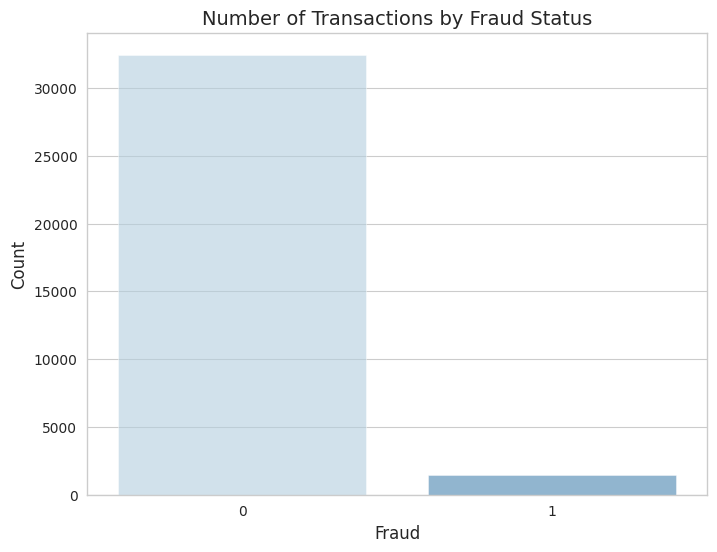

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.barplot(data=fraud_vals, x="fraud_bool", y="count", palette="Blues", alpha=.6)

# Customize labels and legend
plt.xlabel("Fraud", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Number of Transactions by Fraud Status", fontsize=14)

# Display plot
plt.show()


The graph of the binary target feature reveals a highly imbalanced distribution, characterised by an extremely low prevalence of the positive class.

### 1.2 Missing Values of Features by Fraud Status

In [6]:
# Initialize an empty DataFrame to hold the percentage of missing values for each feature
missing_vals = pd.DataFrame()

# List of features to check for missing values
missing_features = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

# For each feature, replace -1 values with NaN, calculate the percentage of missing values, and add to the missing_vals DataFrame
for feature in missing_features:
    df.loc[df[feature] < 0, feature] = np.nan # df[feature] = df[feature].replace(-1, np.nan)
    missing_vals_col = df.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()/len(x) * 100, 2))
    missing_vals[feature] = missing_vals_col

print(missing_vals)

            prev_address_months_count  current_address_months_count  \
fraud_bool                                                            
0                               71.06                          0.43   
1                               91.89                          0.13   

            intended_balcon_amount  bank_months_count  \
fraud_bool                                              
0                            74.09              25.23   
1                            88.38              37.54   

            session_length_in_minutes  device_distinct_emails_8w  
fraud_bool                                                        
0                                0.20                       0.04  
1                                0.16                       0.04  


In [7]:
# Reshape the missing_vals DataFrame from wide to long format
missing_vals = pd.DataFrame(missing_vals.T.stack())

# Reset the index and rename the columns
missing_vals.reset_index(inplace=True)
missing_vals.rename(columns={'level_0': 'feature', 0: 'missing_vals'}, inplace=True)

print(missing_vals)

                         feature  fraud_bool  missing_vals
0      prev_address_months_count           0         71.06
1      prev_address_months_count           1         91.89
2   current_address_months_count           0          0.43
3   current_address_months_count           1          0.13
4         intended_balcon_amount           0         74.09
5         intended_balcon_amount           1         88.38
6              bank_months_count           0         25.23
7              bank_months_count           1         37.54
8      session_length_in_minutes           0          0.20
9      session_length_in_minutes           1          0.16
10     device_distinct_emails_8w           0          0.04
11     device_distinct_emails_8w           1          0.04


<Figure size 800x600 with 0 Axes>

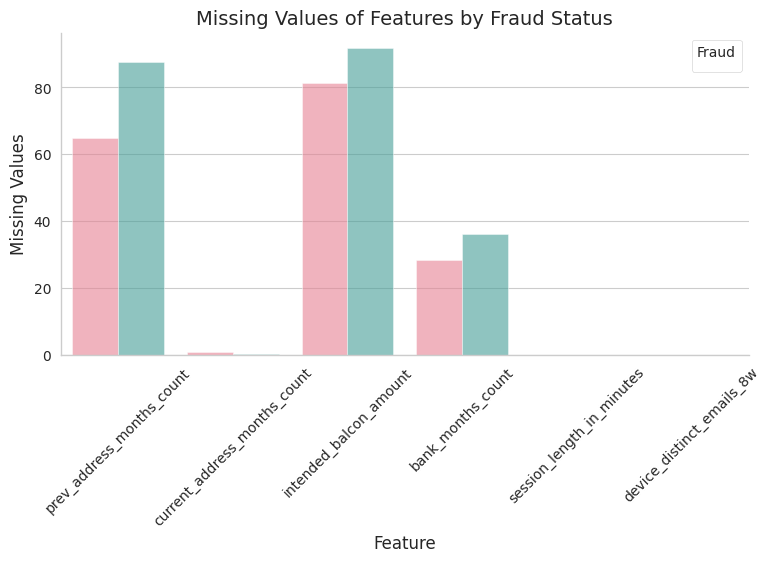

In [ ]:
# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.catplot(data=missing_vals, kind="bar", x="feature", y="missing_vals", hue="fraud_bool", palette=my_palette, alpha=.6, height=4, aspect=2, legend=False)

# Customize labels and legend
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Missing Values", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Missing Values of Features by Fraud Status", fontsize=14)
plt.legend(title="Fraud", fontsize=10)

# Display plot
plt.show()

When examining features like `prev_address_months_count`, `intended_balcon_amount`, and `bank_months_count`, it becomes apparent that a considerable number of missing values exist in their original distribution. However, despite these missing values, these features still hold informative value and exhibit correlation with the target feature.

It's important to highlight that the missing values in these features are actually represented by negative values and were not transformed into explicit missing values during preprocessing. The potential impact of such a transformation has not been evaluated, as it could potentially result in information loss, even though negative values themselves do not possess any specific meaning.

### 1.3 Distribution and Outliers of Features by Fraud Status

In [8]:
# Create a list of numeric features in the DataFrame df
numeric_features = [x for x in df.columns if df[x].nunique() >= 10]

print(numeric_features)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']


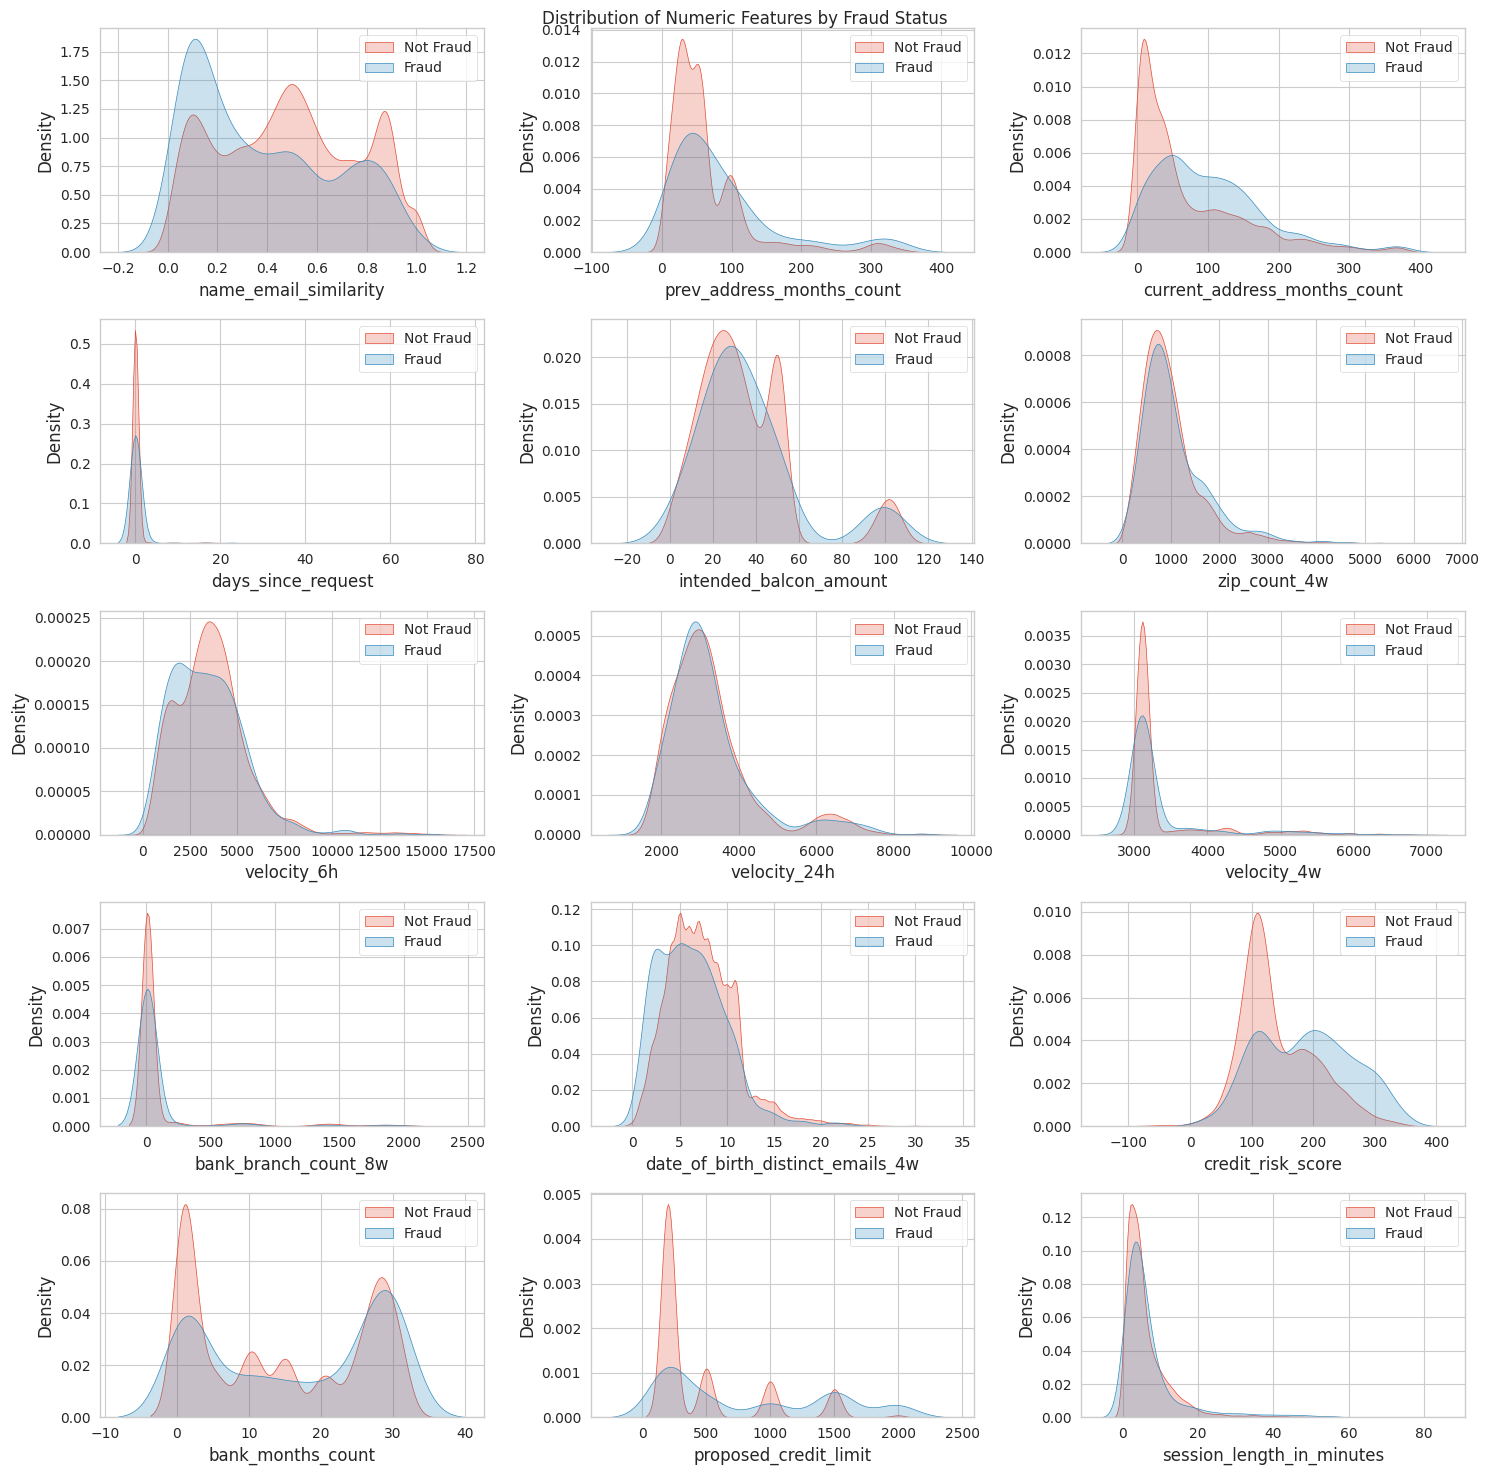

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=df[df['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=df[df['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

<ipython-input-25-a5f817a55da0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
<ipython-input-25-a5f817a55da0>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Fraud', 'Fraud'])
<ipython-input-25-a5f817a55da0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
<ipython-input-25-a5f817a55da0>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a

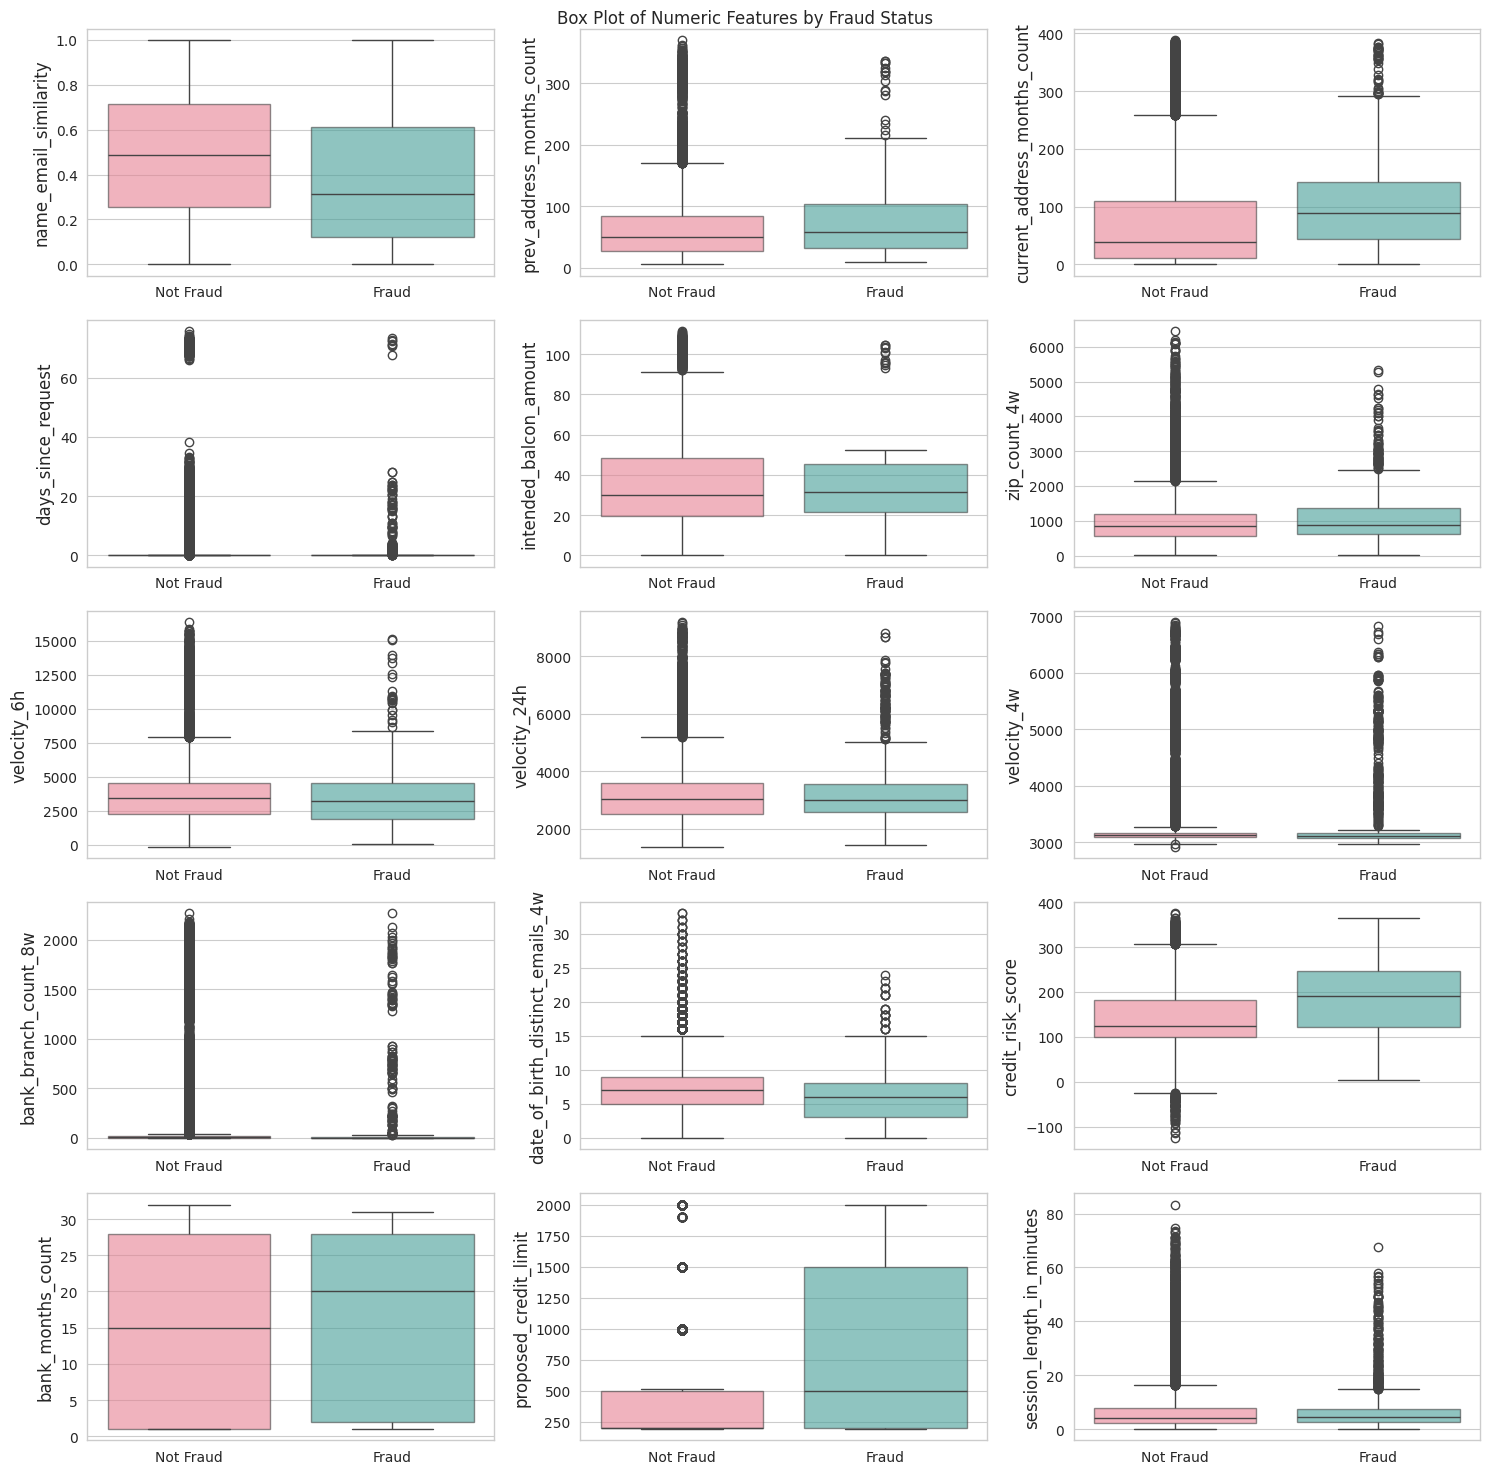

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Box Plot of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a box plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.boxplot(data=df, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Removing outliers in the context of imbalanced data can pose challenges. Outliers may contain valuable information or represent rare instances of the minority class. Their removal can lead to information loss, distort the class distribution, introduce bias towards the majority class, and deviate from real-world scenarios.

Considering the potential impact on model performance, it is important to exercise caution and explore alternative approaches that preserve the integrity of the imbalanced data while addressing outliers, such as robust modeling techniques or outlier detection methods specifically designed for imbalanced datasets.

# 2. Feature Engineering for Fraud Detection of Bank Account Applications

### 2.1 One-Hot Encoding for Categorical Features

In [9]:
# Create a list of categorical features in the DataFrame new_df whose data type is `object`
categorical_features = [x for x in new_df.columns if new_df[x].dtypes == "O"]

print(categorical_features)

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [10]:
# Convert categorical variables into dummy variables using one-hot encoding
new_df = pd.DataFrame(pd.get_dummies(new_df, prefix=categorical_features))

In [ ]:
# Display the first 5 rows of the DataFrame
new_df.head()

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           1     0.9               0.166828                         -1   
1           1     0.9               0.296286                         -1   
2           1     0.9               0.044985                         -1   
3           1     0.9               0.159511                         -1   
4           1     0.9               0.596414                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            88            50            0.020925   
1                           144            50            0.005418   
2                           132            40            3.108549   
3                            22            50            0.019079   
4                           218            50            0.004441   

   intended_balcon_amount  zip_count_4w   velocity_6h  velocity_24h  \
0               -1.331345           769  10650.765523   3134.319630   
1               -0.816224           366    534.047319   2670.918292   
2               -0.755728           870   4048.534263   2893.621498   
3               -1.205124           810   3457.064063   4054.908412   
4               -0.773276           890   5020.341679   2728.237159   

   velocity_4w  bank_branch_count_8w  date_of_birth_distinct_emails_4w  \
0  3863.647740                     1                                 6   
1  3124.298166                   718                                 3   
2  3159.590679                     1                                14   
3  3022.261812                  1921                                 6   
4  3087.670952                  1990                                 2   

   credit_risk_score  email_is_free  phone_home_valid  phone_mobile_valid  \
0                185              0                 1                   0   
1                259              1                 0                   0   
2                177              1                 0                   1   
3                110              1                 0                   1   
4                295              1                 1                   0   

   bank_months_count  has_other_cards  proposed_credit_limit  foreign_request  \
0                 24                0                  500.0              0.0   
1                 15                0                 1500.0              0.0   
2                 -1                0                  200.0              0.0   
3                 31                1                  200.0              0.0   
4                 31                0                 1500.0              0.0   

   session_length_in_minutes  keep_alive_session  device_distinct_emails_8w  \
0                   3.888115                 0.0                        1.0   
1                  31.798819                 0.0                        1.0   
2                   4.728705                 0.0                        1.0   
3                   2.047904                 0.0                        1.0   
4                   3.775225                 1.0                        1.0   

   device_fraud_count  month  payment_type_AA  payment_type_AB  \
0                 0.0    7.0             True            False   
1                 0.0    7.0            False             True   
2                 0.0    7.0            False            False   
3                 0.0    7.0            False             True   
4                 0.0    7.0            False             True   

   payment_type_AC  payment_type_AD  payment_type_AE  employment_status_CA  \
0            False            False            False                  True   
1            False            False            False                  True   
2             True            False            False                 False   
3            False            False            False                  True   
4            False            False            False 

In [11]:
# Separate the feature matrix and target variable
X = new_df.drop(['fraud_bool'], axis=1)
y = new_df['fraud_bool']

One-hot encoding categorical features is a valuable technique that transforms them into a format suitable for machine learning. It represents each category as a binary variable, capturing their distinctness and independence. By utilising one-hot encoding, the algorithm can effectively incorporate categorical information during model training. This enables better prediction and accurate decision-making based on the categorical feature values.

### 2.2 Min-Max Scaling for Numerical Features

In [12]:
# Import the necessary libraries for data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [13]:
# Scale the numeric features in the training and testing sets using MinMaxScaler
numeric_transformer = MinMaxScaler()

# Define the ColumnTransformer object with the numeric transformer and the list of numeric features
preprocessor = ColumnTransformer([('scaled', numeric_transformer, numeric_features)], remainder='passthrough')

# Fit the preprocessor on the training set and transform both the training and testing sets
X_scaled = preprocessor.fit_transform(X)
# X_test_scaled = preprocessor.transform(X_test)

In [14]:
# Get the names of the features after pre-processing
feature_names = preprocessor.get_feature_names_out()

# Remove 'remainder__' from the feature names
feature_names = [feature.replace('remainder__', '') for feature in feature_names]

# Print the pre-processed feature names
print(feature_names)

['scaled__name_email_similarity', 'scaled__prev_address_months_count', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes', 'income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 'housing_status_B

In [15]:
# Convert the scaled training and testing sets to pandas DataFrames
X_scaled = pd.DataFrame(X_scaled, columns=feature_names)

MinMax scaling is employed to normalise numerical features within a specific range, usually 0 to 1. This technique standardises the features, ensuring equitable evaluation during training. By applying MinMax scaling, the numerical features become comparable, resulting in more dependable and precise outcomes from the machine learning algorithm.

# 3. Feature Selection for Fraud Detection of Bank Account Applications

In [16]:
# Import the necessary libraries for feature selection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, chi2, mutual_info_classif
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import ExtraTreesClassifier

### Resampling for Effective Feature Selection Tests

In [17]:
# Import the necessary libraries for undersampling imbalanced datasets
from imblearn.under_sampling import NearMiss
from collections import Counter

In [ ]:
print(X_scaled.isna().sum())


scaled__name_email_similarity               0
scaled__prev_address_months_count           0
scaled__current_address_months_count        0
scaled__days_since_request                  0
scaled__intended_balcon_amount              0
scaled__zip_count_4w                        0
scaled__velocity_6h                         0
scaled__velocity_24h                        0
scaled__velocity_4w                         0
scaled__bank_branch_count_8w                0
scaled__date_of_birth_distinct_emails_4w    0
scaled__credit_risk_score                   0
scaled__bank_months_count                   0
scaled__proposed_credit_limit               0
scaled__session_length_in_minutes           1
income                                      0
customer_age                                0
email_is_free                               0
phone_home_valid                            0
phone_mobile_valid                          0
has_other_cards                             0
foreign_request                   

In [ ]:
print(X_scaled.isna().sum().sum())  # This should return 0 if there are no NaNs left

6


In [ ]:
# Print the count of NaNs per column to locate the specific ones with issues
print(X_scaled.isna().sum())


scaled__name_email_similarity               0
scaled__prev_address_months_count           0
scaled__current_address_months_count        0
scaled__days_since_request                  0
scaled__intended_balcon_amount              0
scaled__zip_count_4w                        0
scaled__velocity_6h                         0
scaled__velocity_24h                        0
scaled__velocity_4w                         0
scaled__bank_branch_count_8w                0
scaled__date_of_birth_distinct_emails_4w    0
scaled__credit_risk_score                   0
scaled__bank_months_count                   0
scaled__proposed_credit_limit               0
scaled__session_length_in_minutes           1
income                                      0
customer_age                                0
email_is_free                               0
phone_home_valid                            0
phone_mobile_valid                          0
has_other_cards                             0
foreign_request                   

In [18]:
# Drop rows with NaNs in the specific columns
X_scaled_cleaned = X_scaled.dropna(subset=[
    'scaled__session_length_in_minutes',
    'foreign_request',
    'keep_alive_session',
    'device_distinct_emails_8w',
    'device_fraud_count',
    'month'
])

# Ensure y matches the indices of the cleaned X_scaled
y_cleaned = y[X_scaled_cleaned.index]


In [19]:
X_scaled_dropped = X_scaled.dropna()
y_dropped = y[X_scaled_dropped.index]  # Adjust y to match the filtered X_scaled


In [20]:
from imblearn.under_sampling import NearMiss
from collections import Counter

# Print the initial class distribution
print(f'Test dataset samples per class {Counter(y_cleaned)}')

# Instantiate NearMiss with desired parameters
nm = NearMiss(sampling_strategy=1, n_jobs=-1)

# Perform undersampling
X_scaled_nm, y_scaled_nm = nm.fit_resample(X_scaled_cleaned, y_cleaned)

# Print the resampled class distribution to verify the balance
print('Resampled dataset shape:', Counter(y_scaled_nm))


Test dataset samples per class Counter({0: 988971, 1: 11029})
Resampled dataset shape: Counter({0: 11029, 1: 11029})


Undersampling the imbalanced dataset for feature selection tests has been carried out to address the issue of class imbalance. By reducing the instances of the majority class, the dataset becomes more balanced, allowing for a fairer evaluation of the feature selection process. This approach helps mitigate any potential bias towards the majority class and ensures that the selected features are robust and informative for both classes.

In [21]:
# Create a list of categorical features in the DataFrame X_scaled_nm
categorical_features = [feature for feature in X_scaled_nm.columns if X_scaled_nm[feature].nunique() >= 2 and X_scaled_nm[feature].nunique() < 10]

print(categorical_features)

['income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'month', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 'housing_status_BG', 'source_INTERNET', 'source_TELEAPP', 'device_os_linux', 'device_os_macintosh', 'device_os_other', 'device_os_windows', 'device_os_x11']


In [22]:
# Create a list of numerical features in the DataFrame X_scaled_nm
numeric_features = [feature for feature in X_scaled_nm.columns if X_scaled_nm[feature].nunique() >= 10]

print(numeric_features)

['scaled__name_email_similarity', 'scaled__prev_address_months_count', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes']


### 3.1 Variance Threshold Test for Constant Features

In [23]:
# Instantiate a VarianceThreshold selector and fit it to the NearMiss-resampled training set
selector = VarianceThreshold()
selector.fit(X_scaled_nm)

# Get the names of the constant features
constant_features = [feature for feature in X_scaled_nm.columns
                     if feature not in X_scaled_nm.columns[selector.get_support()]]

# Print the names of the constant features
print(constant_features)

['device_fraud_count']


In [24]:
# Dropping constant features
X_scaled_nm.drop(['device_fraud_count'], axis=1, inplace=True)

Features with no variance have been dropped from the dataset to improve the quality of the analysis. These features provide no useful information as they exhibit the same value across all instances. By removing them, we eliminate redundancy and reduce noise, enabling a more focused and accurate exploration of the remaining features.

### 3.2 Pearson Correlation Test for Multicollinearity

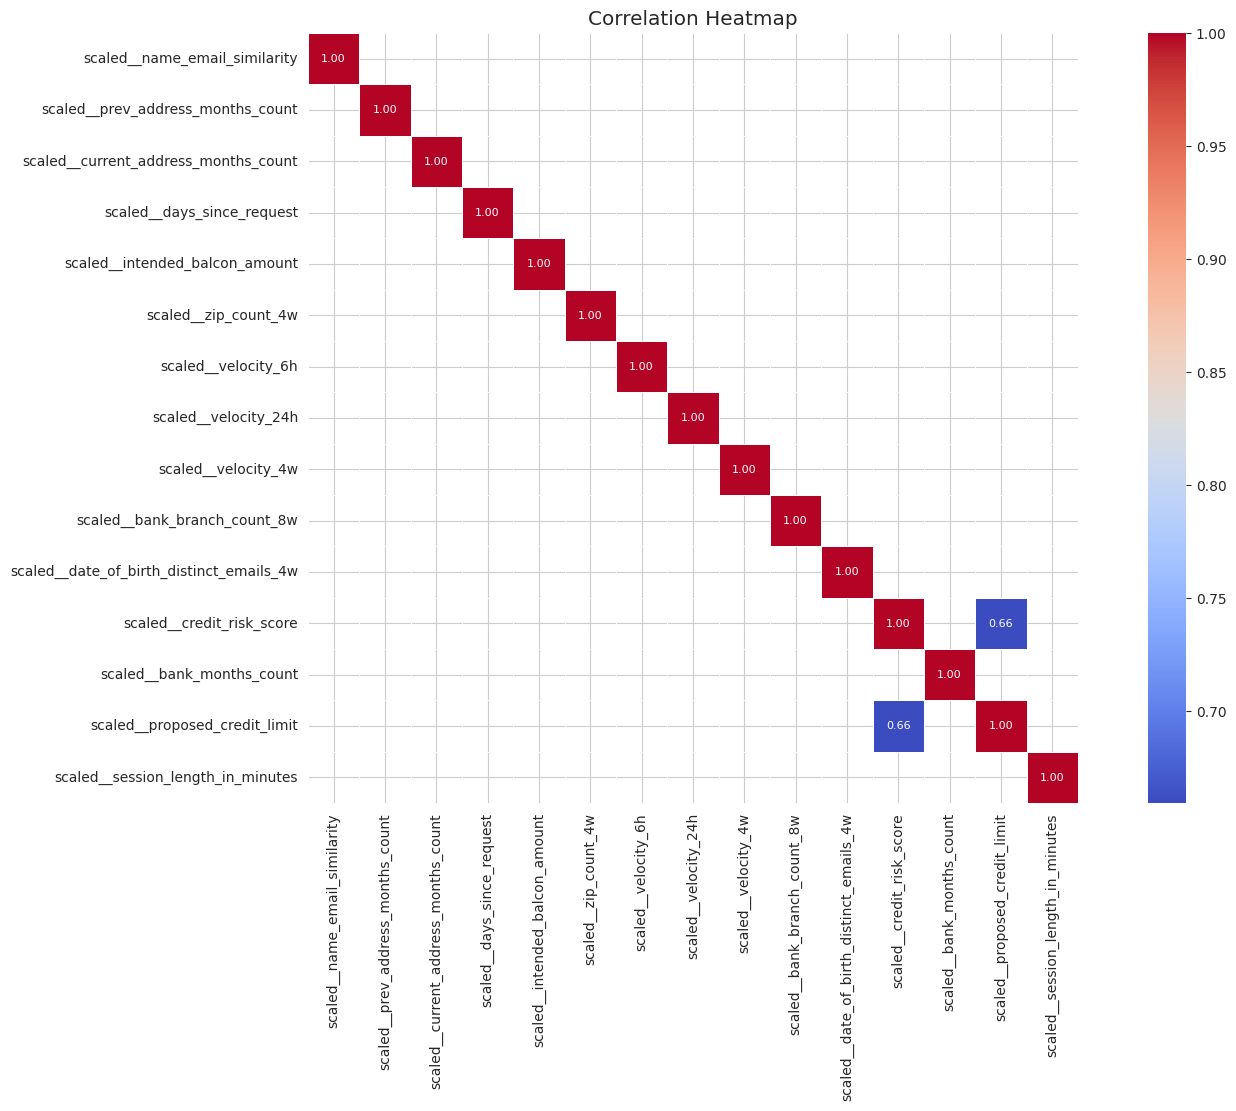

In [ ]:
# Compute correlation matrix
X_train_corr = X_scaled_nm[numeric_features].corr()

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(X_train_corr[(X_train_corr >= 0.4) | (X_train_corr <= -0.4)], annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=ax, annot_kws={"fontsize": 8})
plt.title('Correlation Heatmap')
plt.show()

To assess multicollinearity within the dataset, Pearson correlation coefficient was employed as a measure of linear relationship between features. This statistical analysis helped identify potential correlations between variables. Fortunately, no features displayed a correlation exceeding 0.67, indicating a lack of strong linear dependencies.

### 3.3 Chi-Squared Test for Categorical Features

In [ ]:
# Check the distribution of values in a column
X_scaled_nm.device_distinct_emails_8w.value_counts()

device_distinct_emails_8w
1.0    2770
2.0      74
0.0      12
Name: count, dtype: int64

In [25]:
# Identify the rows to drop based on a condition on a specific feature
rows_to_drop = np.where(X_scaled_nm['device_distinct_emails_8w'] < 0)[0]
rows_to_drop

# Drop the corresponding rows in X_train and y_train
X_train_cat = X_scaled_nm[categorical_features].copy()
X_train_cat.drop(rows_to_drop, axis=0, inplace=True)

y_train_cat = y_scaled_nm.copy()
y_train_cat.drop(rows_to_drop, axis=0, inplace=True)

In [26]:
# Use chi-squared test to evaluate the relationship between categorical features and the target variable
chi2_results = chi2(X_train_cat, y_train_cat)

In [27]:
# Create a pandas DataFrame to store the chi-squared test results
chi2_results_df = pd.DataFrame(data={'feature': X_train_cat.columns, 'chi2': chi2_results[0], 'p_value': chi2_results[1]})

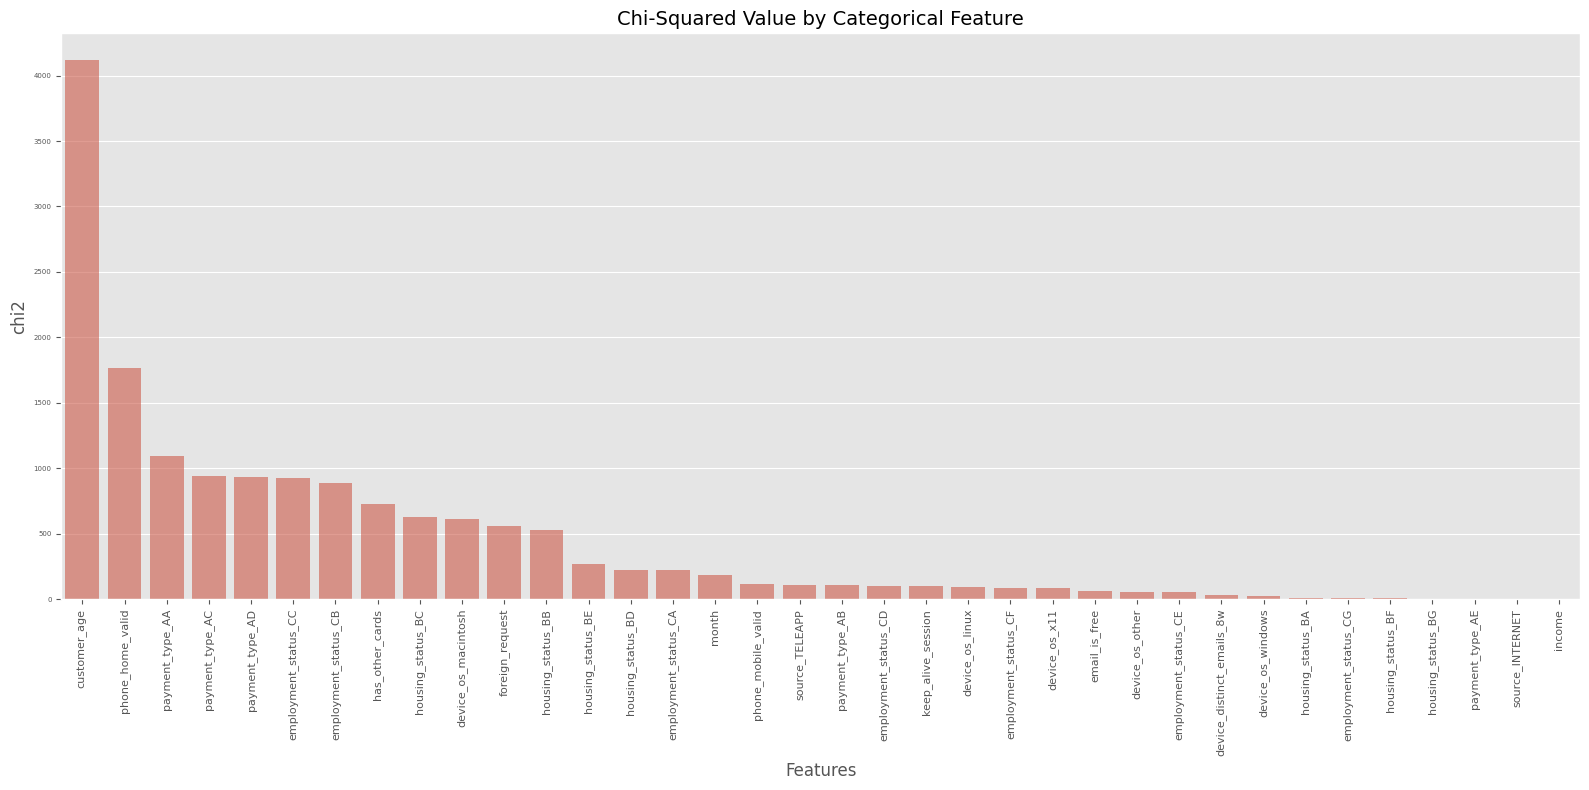

In [28]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=chi2_results_df.sort_values(by='chi2', ascending=False), x="feature", y="chi2", alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("chi2", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=5)
plt.title("Chi-Squared Value by Categorical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

To explore the connection between categorical features and the target variable, a chi-squared test was conducted. This statistical analysis allowed us to evaluate the relationship between the categorical variables and the target feature. The results of the chi-squared test unveiled an intriguing insight: among the examined categorical features, `customer_age` stood out as the most influential predictor of the target variable.

In [29]:
# Use SelectKBest with chi-squared test to select the top 5 categorical features that are most strongly associated with the target variable
best_chi2_cols = SelectKBest(chi2, k=15)
best_chi2_cols.fit(X_train_cat, y_train_cat)

# Get the names of the top 5 features
best_chi2_features = [X_train_cat.columns[best_chi2_cols.get_support()]]

# Print the names of the top 5 features
print(best_chi2_features)

[Index(['customer_age', 'phone_home_valid', 'has_other_cards',
       'foreign_request', 'payment_type_AA', 'payment_type_AC',
       'payment_type_AD', 'employment_status_CA', 'employment_status_CB',
       'employment_status_CC', 'housing_status_BB', 'housing_status_BC',
       'housing_status_BD', 'housing_status_BE', 'device_os_macintosh'],
      dtype='object')]


### 3.4 Mutual Information Test for Numeric Features

In [30]:
# Create a new DataFrame with only the numeric features from the preprocessed training data
X_train_num = X_scaled_nm[numeric_features].copy()

# Create a copy of the target variable
y_train_num = y_scaled_nm.copy()

In [31]:
# Use mutual information test to evaluate the relationship between numerical features and the target variable
mutual_info_results = mutual_info_classif(X_train_num, y_train_num)

In [32]:
# Create a pandas DataFrame to store the mutual information test results
mutual_info_results_df = pd.DataFrame(data={'feature': X_train_num.columns, 'mutual_info': mutual_info_results})

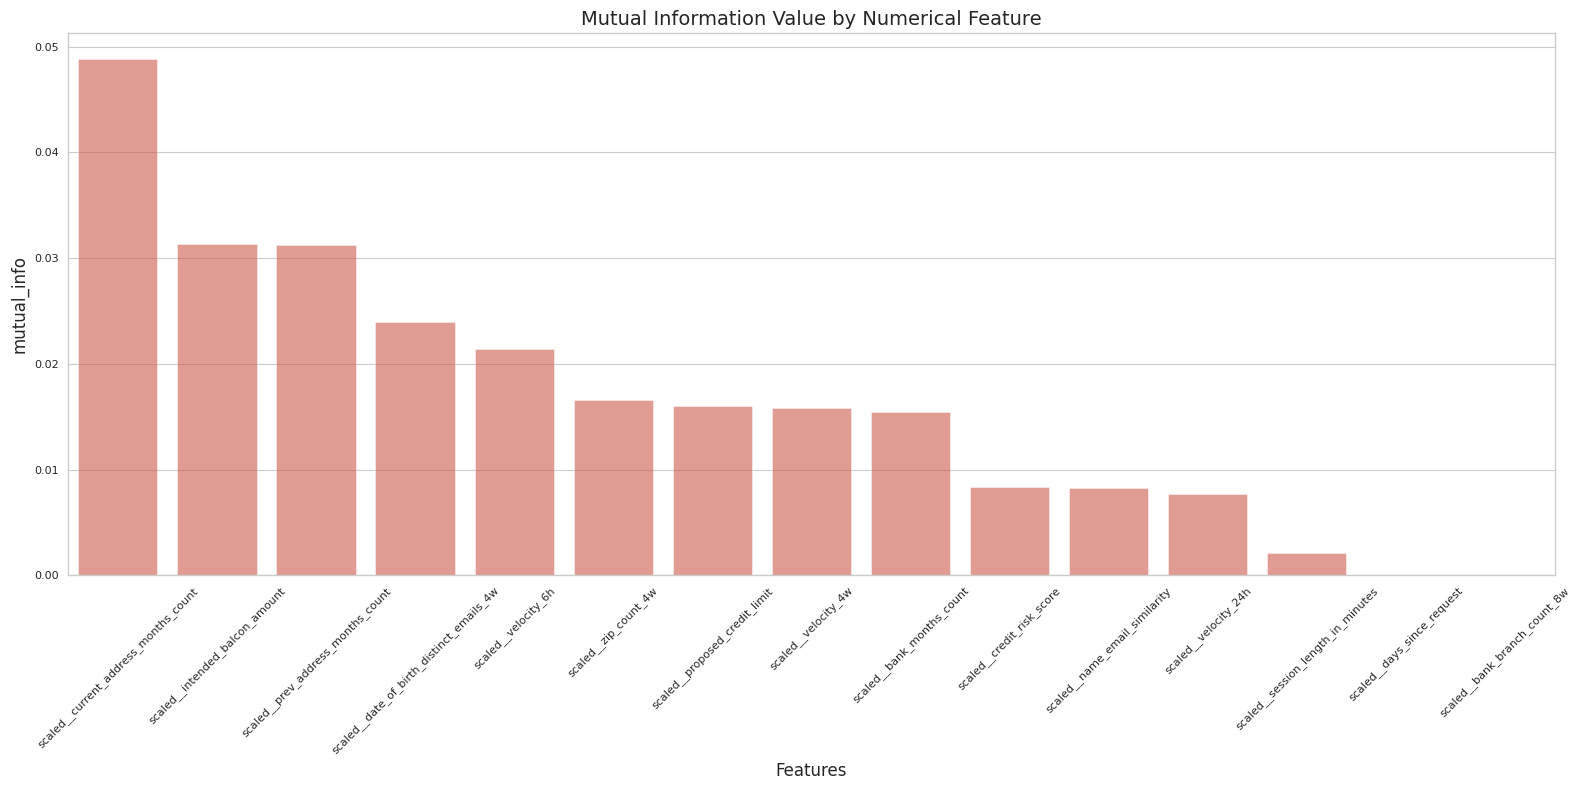

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=mutual_info_results_df.sort_values(by='mutual_info', ascending=False), x="feature", y="mutual_info", alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("mutual_info", fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Mutual Information Value by Numerical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

To explore the connection between numeric features and the target variable, a mutual information test was conducted. This statistical analysis allowed us to evaluate the relationship between the numeric variables and the target feature. The results of the mutual information test unveiled an intriguing insight: among the examined numeric features, `bank_months_count`, `current_address_months_count`, and `prev_address_months_count` stood out as the most influential predictor of the target variable.

In [33]:
# Use SelectKBest with mutual information test to select the top 5 numerical features that are most strongly associated with the target variable
best_mutual_info_cols = SelectKBest(mutual_info_classif, k=15)
best_mutual_info_cols.fit(X_train_num, y_train_num)

# Get the names of the top 5 features
best_mutual_info_features = [X_train_num.columns[best_mutual_info_cols.get_support()]]

# Print the names of the top 5 features
print(best_mutual_info_features)

[Index(['scaled__name_email_similarity', 'scaled__prev_address_months_count',
       'scaled__current_address_months_count', 'scaled__days_since_request',
       'scaled__intended_balcon_amount', 'scaled__zip_count_4w',
       'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w',
       'scaled__bank_branch_count_8w',
       'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score',
       'scaled__bank_months_count', 'scaled__proposed_credit_limit',
       'scaled__session_length_in_minutes'],
      dtype='object')]


### 3.5 Extra Trees Classifier for Feature Selection

In [34]:
extra = ExtraTreesClassifier(n_estimators=50, random_state=0)
extra.fit(X_scaled_nm, y_scaled_nm)

# Create a SelectFromModel object with the fitted Random Forest model
feature_sel_extra = SelectFromModel(extra, prefit=True)

# Get the names of the selected features by calling .get_support() on the SelectFromModel object
best_extra_features = [X_scaled_nm.columns[(feature_sel_extra.get_support())]]
best_extra_features = list(best_extra_features[0])

# Print the names of the selected features
print(best_extra_features)

['scaled__name_email_similarity', 'scaled__current_address_months_count', 'scaled__days_since_request', 'scaled__intended_balcon_amount', 'scaled__zip_count_4w', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'scaled__bank_branch_count_8w', 'scaled__date_of_birth_distinct_emails_4w', 'scaled__credit_risk_score', 'scaled__bank_months_count', 'scaled__proposed_credit_limit', 'scaled__session_length_in_minutes', 'income', 'customer_age', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'device_distinct_emails_8w', 'month', 'payment_type_AA', 'payment_type_AC', 'payment_type_AD', 'employment_status_CA', 'housing_status_BC', 'device_os_windows']


In [35]:
extra_importances = pd.DataFrame({'feature': X_scaled_nm.columns, 'importance': extra.feature_importances_, 'model': 'ExtraTreesClassifier'})

<ipython-input-60-65c38ba5324b>:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model", palette=my_palette, alpha=.6)


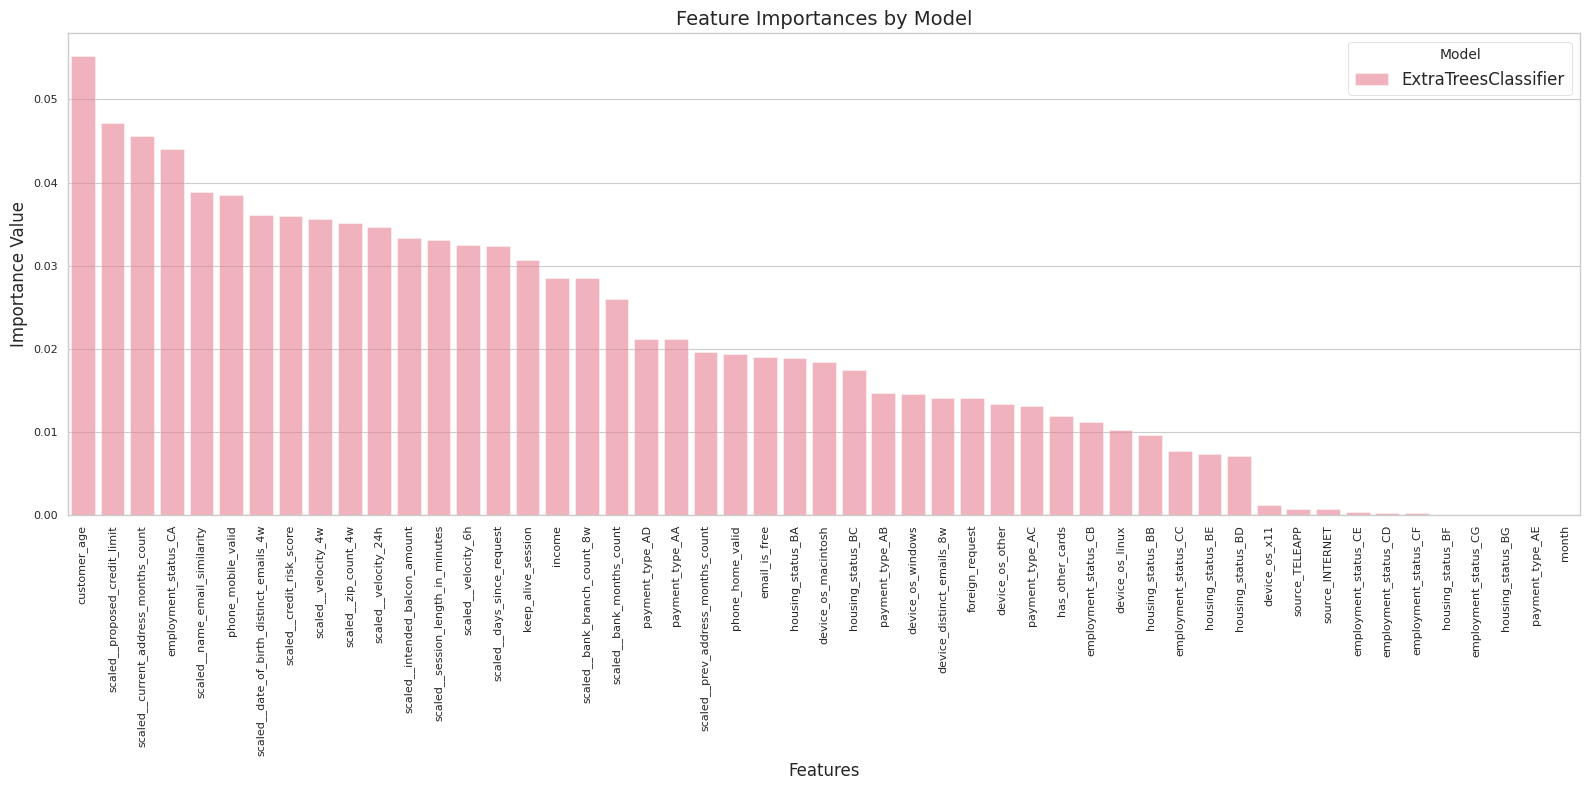

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create grouped bar plot
sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Value", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Feature Importances by Model", fontsize=14)
plt.legend(title='Model', fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

The decision to employ the ExtraTreesClassifier for feature selection was motivated by its robustness and compatibility with our dataset. In contrast to the chi-squared and mutual information tests, the ExtraTreesClassifier yielded different outcomes. After evaluating various features using this model, we identified the most influential predictors for the target feature. Notably, `employment_status_CA`, `phone_home_valid`, `customer_age`, `payment_type_AC`, and `phone_mobile_valid` emerged as the top features.

# 4. Fraud Detection Model Training Functions using SMOTE and Grid Search CV

SMOTE (Synthetic Minority Over-sampling Technique) is an over-sampling technique used to tackle class imbalance problems. Unlike random under-sampling, SMOTE generates synthetic data points to create an equal balance between the minority and majority class. It picks the distance between the closest neighbors of the minority class to create new synthetic points. SMOTE retains more information since no rows are eliminated, unlike random under-sampling. However, SMOTE can take longer to train due to the generation of synthetic data.

When using SMOTE or undersampling techniques, it is crucial not to apply them before cross-validation. This is because it can influence the validation set before the cross-validation process, leading to overfitting. By doing so, we risk introducing data leakage. Instead, we should generate synthetic data points during cross-validation to avoid affecting the validation set. In this way, synthetic data is created only for the training set, ensuring that the validation set remains untouched.

![smote-cross-validation.png](attachment:smote-cross-validation.png)

In [36]:
# Import the necessary libraries for oversampling imbalanced datasets
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import make_pipeline

In [37]:
# Import necessary modules for hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV

In [38]:
def train_classifier(classifier, param_dist, X_train, y_train, encoded_features, search_type='random'):
    """
    Train a classifier using the specified parameters and return the trained model.

    Parameters:
    classifier (sklearn estimator): The estimator to train.
    param_dist (dict): The distribution of parameters to search over.
    X_train (pandas DataFrame): The training features.
    y_train (pandas Series): The training target.
    encoded_features (list): A list of encoded categorical features.
    search_type (str, optional): The type of hyperparameter search to perform. Must be either 'random' or 'grid'. Defaults to 'random'.

    Returns:
    A trained classifier.
    """

    # Apply SMOTENC to deal with imbalanced classes
    smote_nc = SMOTENC(categorical_features=encoded_features, sampling_strategy='minority', random_state=42)

    # Create pipeline with SMOTENC and the classifier
    pipeline = make_pipeline(smote_nc, classifier)

    # Define cross-validation strategy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform hyperparameter search
    if search_type == 'random':
        search_cv = RandomizedSearchCV(estimator=pipeline,
                                      param_distributions=param_dist,
                                      n_iter=20,
                                      scoring="roc_auc",
                                      n_jobs=-1,
                                      cv=cv)
    elif search_type == 'grid':
        search_cv = GridSearchCV(estimator=pipeline,
                                 param_grid=param_dist,
                                 scoring="roc_auc",
                                 n_jobs=-1,
                                 cv=cv)
    else:
        raise ValueError('search_type must be either "random" or "grid"')

    # Fit the model and return the trained classifier
    search_cv.fit(X_train, y_train)

    return search_cv


# 5. Fraud Detection Model Testing Functions using Recall and ROC-AUC

Accuracy alone may not be a reliable metric for evaluating bank account fraud models, especially when dealing with imbalanced datasets. Instead, precision, recall, and F1 score are better options. Among these metrics, recall at a 5% FPR is ideal for minimising false negatives and reducing the risk of flagging legitimate transactions as fraudulent, which can lead to customer attrition. Prioritising the identification of fraudulent transactions while minimising false positives can help prevent customer loss.

In addition, the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) are also useful tools for evaluating the performance of fraud detection models. The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR), allowing one to assess the trade-off between sensitivity and specificity. AUC measures the overall performance of the model, with a higher value indicating better performance. While recall at a 5% FPR is the primary metric for this project, ROC and AUC can provide additional insights into the model's performance.

<br>

$$ Recall = {TP \over TP + FN}  $$

<br>

$$ False\;Positive\;Rate = {FP \over FP + TN} $$

<br>

In [39]:
# Importing the necessary libraries for metrics and evaluation
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, auc, roc_curve

### 5.1 Classification Report for Model Testing

In [40]:
def print_cls_report(y_test, y_pred, title):
    # Calculate the classification report
    default_report = classification_report(y_test, y_pred, target_names=['No Fraud', 'Fraud'])

    # Calculate precision, recall, f1 score and support for each class
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

    # Print the title and the default classification report
    print(title)
    print('*****' * 10)
    print(default_report)

    # Return the recall scores for each class
    return recall

### 5.2 Confusion Matrix for Model Testing

In [41]:
def plot_con_matrix(ax, y_test, y_pred, title):
    # Define the classes of the classification problem
    classes = ['No Fraud', 'Fraud']

    # Compute the confusion matrix
    con_matrix = confusion_matrix(y_test, y_pred)

    # Compute the values for true negatives, false positives, false negatives, and true positives
    tn, fp, fn, tp = con_matrix.ravel()

    # Compute the false positive rate
    fpr = fp / (fp + tn)

    # Plot the confusion matrix using a heatmap
    ax.imshow(con_matrix, interpolation='nearest', cmap=plt.cm.Blues)

    # Define the tick marks and the labels for the plot
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    # Add the count of each cell of the confusion matrix to the plot
    fmt = 'd'
    threshold = con_matrix.max() / 2.
    for i, j in np.ndindex(con_matrix.shape):
        ax.text(j, i, format(con_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if con_matrix[i, j] > threshold else "black")

    # Add labels to the plot
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(f'{title} with {fpr*100:.2f}% FPR')

### 5.3 Cross-Validation Results for Model Testing

In [42]:
def print_cv_results(model):
    # Get the parameter and score arrays from the cv_results_ dictionary
    means = model.cv_results_['mean_test_score']
    params = model.cv_results_['params']

    # Combine the arrays using zip()
    combined_results = zip(means, params)

    # Sort the combined array by mean_test_score in descending order
    sorted_results = sorted(combined_results, key=lambda x: x[0], reverse=True)

    # Print the mean test score and the hyperparameters as a formatted string
    for mean, param in sorted_results:
        print("mean_test_score: %f, params: %r" % (mean, param))

### 5.4 ROC-AUC for Model Testing

In [43]:
def plot_roc_curves(fpr_list, tpr_list, label_list):
    plt.figure(figsize=(8, 8))
    for i in range(len(fpr_list)):
        # Compute the ROC AUC score
        roc_auc_score = auc(fpr_list[i], tpr_list[i])
        # Plot the ROC curve
        plt.plot(fpr_list[i], tpr_list[i], label=f'{label_list[i]} (AUC={roc_auc_score:.2f})')

    # Plot the random classifier curve
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    # Set the plot labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


In [44]:
def test_classifier(classifier, X_test, y_test):
    """
    Evaluates a binary classifier by generating ROC curves, classification reports, and confusion matrices.

    Parameters:
    -----------
    classifier : classifier object
        Binary classifier object to be evaluated.
    X_test : numpy.ndarray or pandas.DataFrame
        Test feature data.
    y_test : numpy.ndarray or pandas.Series
        Test target labels.

    Returns:
    --------
    tuple : A tuple containing four values - false positive rate (fpr), true positive rate (tpr),
            default recall, and target recall.
    """

    # Predict class probabilities and labels using the trained classifier
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate and true positive rate for different threshold values
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Choose a false positive rate threshold based on the ROC curve
    target_fpr = 0.05
    threshold_idx = np.argmin(np.abs(fpr - target_fpr))
    threshold = thresholds[threshold_idx]

    # Make predictions on the testing set using the threshold
    y_pred_threshold = (y_prob >= threshold).astype(int)

    # Print the classification report for both default and target threshold
    default_recall = print_cls_report(y_test, y_pred, title="Default Threshold")
    target_recall = print_cls_report(y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    # Plot confusion matrix
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    default_matrix = plot_con_matrix(ax1, y_test, y_pred, title='Default Threshold @ 0.50')
    target_matrix = plot_con_matrix(ax2, y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    # Adjust subplots for better visibility
    plt.tight_layout()

    # Display the plots
    plt.show()

    return fpr, tpr, default_recall, target_recall


# 6. Model Training -> Train-Test Split

In [47]:
# Importing tree-based classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### Resampling for Effective Model Training

In [48]:
# Separate the feature matrix and target variable
X = new_df.drop(['fraud_bool'], axis=1)
y = new_df['fraud_bool']

In [49]:
# Dropping constant features from Variance Threshold test
X.drop(['device_fraud_count'], axis=1, inplace=True)

# # Selecting features from ExtraTreesClassifier test
# selected_features = [feature.replace('scaled__', '') for feature in best_extra_features]
# X = X[selected_features]

In [50]:
print(X.isna().sum().sum())  # Should return 0 if no NaN values remain


0


In [51]:
X = X.dropna()
y = y[X.index]  # Align 'y' with the indices of 'X' after dropping rows


In [52]:
from imblearn.under_sampling import NearMiss
from collections import Counter

print(f'Test dataset samples per class {Counter(y)}')

nm = NearMiss(sampling_strategy=0.1, n_jobs=-1)
X_nm, y_nm = nm.fit_resample(X, y)

print('Resampled dataset shape:', Counter(y_nm))


Test dataset samples per class Counter({0: 988971, 1: 11029})
Resampled dataset shape: Counter({0: 110290, 1: 11029})


In [53]:
# Import the necessary library for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

In [54]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.25, random_state=42, stratify=y_nm)

In [55]:
# Get the indices of the encoded features in the training set
encoded_features = [X_train.columns.get_loc(str(feature)) for feature in X_train.columns if X_train[feature].nunique() >= 2 and X_train[feature].nunique() < 10]

In [56]:
# Importing the pickle library to save and load machine learning models
import pickle

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pickle

# Example dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train models
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
rf_model = RandomForestClassifier().fit(X_train, y_train)
knn_model = KNeighborsClassifier().fit(X_train, y_train)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss').fit(X_train, y_train)
lgb_model = LGBMClassifier().fit(X_train, y_train)

# Save models to .pkl files
with open('dt_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)
with open('lgb_model.pkl', 'wb') as f:
    pickle.dump(lgb_model, f)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:39:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 365, number of negative: 385
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5010
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486667 -> initscore=-0.053346
[LightGBM] [Info] Start training from score -0.053346
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [58]:
# Load pickled model
dt_model = pickle.load(open('/content/dt_model.pkl', 'rb'))
rf_model = pickle.load(open('/content/rf_model.pkl','rb'))
xgb_model = pickle.load(open('/content/xgb_model.pkl', 'rb'))
lgb_model = pickle.load(open('/content/lgb_model.pkl', 'rb'))
knn_model = pickle.load(open('/content/knn_model.pkl', 'rb'))


# 7. Pyspark Codes

In [59]:
!pip install pyspark
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=ca84b2aced36262f91dc6340ffb6cf3841cffa9ce83241192e3de24fe61cb846
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [100]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, FloatType, IntegerType
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("FraudDetectionWithPreparedTrainTest") \
    .getOrCreate()

# Convert to Pandas DataFrame if needed and merge features with labels for PySpark compatibility
train_data = pd.DataFrame(X_train)
train_data['label'] = y_train

test_data = pd.DataFrame(X_test)
test_data['label'] = y_test

# Define schema explicitly
schema = StructType(
    [StructField(str(col), FloatType(), True) for col in train_data.columns[:-1]] +
    [StructField("label", IntegerType(), True)]
)

# Convert Pandas DataFrames to PySpark DataFrames with schema
train_df = spark.createDataFrame(train_data, schema=schema)
test_df = spark.createDataFrame(test_data, schema=schema)



In [101]:
feature_columns = [col for col in train_df.columns if col != "label"]  # Exclude label column

# Assemble the features for PySpark
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

train_df = assembler.transform(train_df).select("features", "label")
test_df = assembler.transform(test_df).select("features", "label")


In [102]:
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
dt_model = dt.fit(train_df)


In [103]:
rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=100)  # Adjust if needed
rf_model = rf.fit(train_df)


In [104]:
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier, GBTClassifier, LogisticRegression
gbt = GBTClassifier(labelCol="label", featuresCol="features", maxIter=100)
gbt_model = gbt.fit(train_df)

In [105]:
# Logistic Regression Classifier
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=100)
lr_model = lr.fit(train_df)

In [106]:
evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")


In [107]:
import time
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Measure the time for training the Decision Tree model
start_time_train = time.time()
dt_model = dt.fit(train_df)  # Assuming 'dt' is your DecisionTreeClassifier object
end_time_train = time.time()
training_time = end_time_train - start_time_train
print(f"Decision Tree Training Time: {training_time:.2f} seconds")

# Measure the time for generating predictions using the Decision Tree model
start_time_predict = time.time()
dt_predictions = dt_model.transform(test_df)
end_time_predict = time.time()
prediction_time = end_time_predict - start_time_predict
print(f"Decision Tree Prediction Time: {prediction_time:.2f} seconds")

# Binary Classification Evaluator for ROC-AUC
binary_evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")

# Multiclass Classification Evaluator for Accuracy, Precision, Recall, and F1
multiclass_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Measure the time for evaluating metrics
start_time_evaluation = time.time()

# ROC-AUC
dt_auc = binary_evaluator.evaluate(dt_predictions)
print(f"Decision Tree ROC-AUC: {dt_auc}")

# Accuracy
accuracy_dt = multiclass_evaluator.evaluate(dt_predictions, {multiclass_evaluator.metricName: "accuracy"})
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Precision
precision_dt = multiclass_evaluator.evaluate(dt_predictions, {multiclass_evaluator.metricName: "weightedPrecision"})
print(f"Decision Tree Precision: {precision_dt}")

# Recall
recall_dt = multiclass_evaluator.evaluate(dt_predictions, {multiclass_evaluator.metricName: "weightedRecall"})
print(f"Decision Tree Recall: {recall_dt}")

# F1 Score
f1_dt = multiclass_evaluator.evaluate(dt_predictions, {multiclass_evaluator.metricName: "f1"})
print(f"Decision Tree F1 Score: {f1_dt}")

end_time_evaluation = time.time()
evaluation_time = end_time_evaluation - start_time_evaluation
print(f"Decision Tree Evaluation Time: {evaluation_time:.2f} seconds")


Decision Tree Training Time: 1.95 seconds
Decision Tree Prediction Time: 0.07 seconds
Decision Tree ROC-AUC: 0.8276650563607084
Decision Tree Accuracy: 0.836
Decision Tree Precision: 0.8458080288214103
Decision Tree Recall: 0.836
Decision Tree F1 Score: 0.8360498567977087
Decision Tree Evaluation Time: 2.16 seconds


In [108]:
import time
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Measure training time
start_time_train = time.time()
rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=100)
rf_model = rf.fit(train_df)
end_time_train = time.time()
training_time = end_time_train - start_time_train
print(f"Random Forest Training Time: {training_time:.2f} seconds")

# Measure prediction time
start_time_predict = time.time()
rf_predictions = rf_model.transform(test_df)
end_time_predict = time.time()
prediction_time = end_time_predict - start_time_predict
print(f"Random Forest Prediction Time: {prediction_time:.2f} seconds")

# Binary Classification Evaluator for ROC-AUC
binary_evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")
rf_auc = binary_evaluator.evaluate(rf_predictions)
print(f"Random Forest ROC-AUC: {rf_auc}")

# Measure evaluation time
start_time_evaluation = time.time()

# Multiclass Classification Evaluator for Accuracy, Precision, Recall, and F1 Score
multiclass_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Accuracy
accuracy_rf = multiclass_evaluator.evaluate(rf_predictions, {multiclass_evaluator.metricName: "accuracy"})
print(f"Random Forest Accuracy: {accuracy_rf}")

# Precision
precision_rf = multiclass_evaluator.evaluate(rf_predictions, {multiclass_evaluator.metricName: "weightedPrecision"})
print(f"Random Forest Precision: {precision_rf}")

# Recall
recall_rf = multiclass_evaluator.evaluate(rf_predictions, {multiclass_evaluator.metricName: "weightedRecall"})
print(f"Random Forest Recall: {recall_rf}")

# F1 Score
f1_rf = multiclass_evaluator.evaluate(rf_predictions, {multiclass_evaluator.metricName: "f1"})
print(f"Random Forest F1 Score: {f1_rf}")

end_time_evaluation = time.time()
evaluation_time = end_time_evaluation - start_time_evaluation
print(f"Random Forest Evaluation Time: {evaluation_time:.2f} seconds")


Random Forest Training Time: 2.62 seconds
Random Forest Prediction Time: 0.04 seconds
Random Forest ROC-AUC: 0.9173590982286639
Random Forest Accuracy: 0.864
Random Forest Precision: 0.8697905054776092
Random Forest Recall: 0.864
Random Forest F1 Score: 0.8641828893442622
Random Forest Evaluation Time: 1.92 seconds


In [109]:
import time
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Measure the time for training the Gradient Boosting model
start_time_train = time.time()
gbt = GBTClassifier(labelCol="label", featuresCol="features", maxIter=50)  # Adjust maxIter as needed
gbt_model = gbt.fit(train_df)
end_time_train = time.time()
training_time = end_time_train - start_time_train
print(f"Gradient Boosting Training Time: {training_time:.2f} seconds")

# Measure the time for generating predictions using the Gradient Boosting model
start_time_predict = time.time()
gbt_predictions = gbt_model.transform(test_df)
end_time_predict = time.time()
prediction_time = end_time_predict - start_time_predict
print(f"Gradient Boosting Prediction Time: {prediction_time:.2f} seconds")

# Binary Classification Evaluator for ROC-AUC
binary_evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")

# Multiclass Classification Evaluator for Accuracy, Precision, Recall, and F1 Score
multiclass_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Measure the time for evaluating metrics
start_time_evaluation = time.time()

# ROC-AUC
gbt_auc = binary_evaluator.evaluate(gbt_predictions)
print(f"Gradient Boosting ROC-AUC: {gbt_auc}")

# Accuracy
accuracy_gbt = multiclass_evaluator.evaluate(gbt_predictions, {multiclass_evaluator.metricName: "accuracy"})
print(f"Gradient Boosting Accuracy: {accuracy_gbt}")

# Precision
precision_gbt = multiclass_evaluator.evaluate(gbt_predictions, {multiclass_evaluator.metricName: "weightedPrecision"})
print(f"Gradient Boosting Precision: {precision_gbt}")

# Recall
recall_gbt = multiclass_evaluator.evaluate(gbt_predictions, {multiclass_evaluator.metricName: "weightedRecall"})
print(f"Gradient Boosting Recall: {recall_gbt}")

# F1 Score
f1_gbt = multiclass_evaluator.evaluate(gbt_predictions, {multiclass_evaluator.metricName: "f1"})
print(f"Gradient Boosting F1 Score: {f1_gbt}")

end_time_evaluation = time.time()
evaluation_time = end_time_evaluation - start_time_evaluation
print(f"Gradient Boosting Evaluation Time: {evaluation_time:.2f} seconds")


Gradient Boosting Training Time: 22.50 seconds
Gradient Boosting Prediction Time: 0.10 seconds
Gradient Boosting ROC-AUC: 0.931755233494364
Gradient Boosting Accuracy: 0.868
Gradient Boosting Precision: 0.8697464139344262
Gradient Boosting Recall: 0.868
Gradient Boosting F1 Score: 0.8681927130962122
Gradient Boosting Evaluation Time: 2.42 seconds


In [110]:
import time
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Measure the time for training the Logistic Regression model
start_time_train = time.time()
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=20)  # Adjust maxIter as needed
lr_model = lr.fit(train_df)
end_time_train = time.time()
training_time = end_time_train - start_time_train
print(f"Logistic Regression Training Time: {training_time:.2f} seconds")

# Measure the time for generating predictions using the Logistic Regression model
start_time_predict = time.time()
lr_predictions = lr_model.transform(test_df)
end_time_predict = time.time()
prediction_time = end_time_predict - start_time_predict
print(f"Logistic Regression Prediction Time: {prediction_time:.2f} seconds")

# Binary Classification Evaluator for ROC-AUC
binary_evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")

# Multiclass Classification Evaluator for Accuracy, Precision, Recall, and F1 Score
multiclass_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Measure the time for evaluating metrics
start_time_evaluation = time.time()

# ROC-AUC
lr_auc = binary_evaluator.evaluate(lr_predictions)
print(f"Logistic Regression ROC-AUC: {lr_auc}")

# Accuracy
accuracy_lr = multiclass_evaluator.evaluate(lr_predictions, {multiclass_evaluator.metricName: "accuracy"})
print(f"Logistic Regression Accuracy: {accuracy_lr}")

# Precision
precision_lr = multiclass_evaluator.evaluate(lr_predictions, {multiclass_evaluator.metricName: "weightedPrecision"})
print(f"Logistic Regression Precision: {precision_lr}")

# Recall
recall_lr = multiclass_evaluator.evaluate(lr_predictions, {multiclass_evaluator.metricName: "weightedRecall"})
print(f"Logistic Regression Recall: {recall_lr}")

# F1 Score
f1_lr = multiclass_evaluator.evaluate(lr_predictions, {multiclass_evaluator.metricName: "f1"})
print(f"Logistic Regression F1 Score: {f1_lr}")

end_time_evaluation = time.time()
evaluation_time = end_time_evaluation - start_time_evaluation
print(f"Logistic Regression Evaluation Time: {evaluation_time:.2f} seconds")


Logistic Regression Training Time: 1.32 seconds
Logistic Regression Prediction Time: 0.05 seconds
Logistic Regression ROC-AUC: 0.9241867954911442
Logistic Regression Accuracy: 0.848
Logistic Regression Precision: 0.8552748733081019
Logistic Regression Recall: 0.848
Logistic Regression F1 Score: 0.8481556878560912
Logistic Regression Evaluation Time: 1.79 seconds


In [111]:
import time
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Measure the time for training the Bisecting K-Means model
start_time_train = time.time()
bkm = BisectingKMeans(featuresCol="features", predictionCol="prediction", k=2)  # Set k based on your data
bkm_model = bkm.fit(train_df)
end_time_train = time.time()
training_time = end_time_train - start_time_train
print(f"Bisecting K-Means Training Time: {training_time:.2f} seconds")

# Measure the time for generating predictions using the Bisecting K-Means model
start_time_predict = time.time()
bkm_predictions = bkm_model.transform(test_df)
end_time_predict = time.time()
prediction_time = end_time_predict - start_time_predict
print(f"Bisecting K-Means Prediction Time: {prediction_time:.2f} seconds")

# Cast prediction column to DoubleType for evaluator compatibility
bkm_predictions = bkm_predictions.withColumn("prediction", col("prediction").cast(DoubleType()))

# Multiclass Classification Evaluator for Accuracy, Precision, Recall, and F1 Score
multiclass_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Measure the time for evaluating metrics
start_time_evaluation = time.time()

# Accuracy
accuracy_bkm = multiclass_evaluator.evaluate(bkm_predictions, {multiclass_evaluator.metricName: "accuracy"})
print(f"KNN Approximation Accuracy: {accuracy_bkm}")

# Precision
precision_bkm = multiclass_evaluator.evaluate(bkm_predictions, {multiclass_evaluator.metricName: "weightedPrecision"})
print(f"KNN Approximation Precision: {precision_bkm}")

# Recall
recall_bkm = multiclass_evaluator.evaluate(bkm_predictions, {multiclass_evaluator.metricName: "weightedRecall"})
print(f"KNN Approximation Recall: {recall_bkm}")

# F1 Score
f1_bkm = multiclass_evaluator.evaluate(bkm_predictions, {multiclass_evaluator.metricName: "f1"})
print(f"KNN Approximation F1 Score: {f1_bkm}")

end_time_evaluation = time.time()
evaluation_time = end_time_evaluation - start_time_evaluation
print(f"Bisecting K-Means Evaluation Time: {evaluation_time:.2f} seconds")


Bisecting K-Means Training Time: 3.51 seconds
Bisecting K-Means Prediction Time: 0.03 seconds
KNN Approximation Accuracy: 0.768
KNN Approximation Precision: 0.7968211920529801
KNN Approximation Recall: 0.768
KNN Approximation F1 Score: 0.7658530942741468
Bisecting K-Means Evaluation Time: 2.63 seconds


In [112]:
import time
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Define the structure of the MLP
layers = [train_df.select("features").first()[0].size, 64, 32, 2]  # Input, hidden layers, output

# Measure the time for training the MLP model
start_time_train = time.time()
mlp = MultilayerPerceptronClassifier(layers=layers, labelCol="label", featuresCol="features", maxIter=100)
mlp_model = mlp.fit(train_df)
end_time_train = time.time()
training_time = end_time_train - start_time_train
print(f"MLP Model Training Time: {training_time:.2f} seconds")

# Measure the time for generating predictions using the MLP model
start_time_predict = time.time()
mlp_predictions = mlp_model.transform(test_df)
end_time_predict = time.time()
prediction_time = end_time_predict - start_time_predict
print(f"MLP Model Prediction Time: {prediction_time:.2f} seconds")

# Multiclass Classification Evaluator for Accuracy, Precision, Recall, and F1 Score
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
evaluator_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

# Measure the time for evaluating metrics
start_time_evaluation = time.time()

# Accuracy
accuracy_mlp = evaluator_accuracy.evaluate(mlp_predictions)
print(f"MLP Model Accuracy: {accuracy_mlp}")

# Precision
precision_mlp = evaluator_precision.evaluate(mlp_predictions)
print(f"MLP Model Precision: {precision_mlp}")

# Recall
recall_mlp = evaluator_recall.evaluate(mlp_predictions)
print(f"MLP Model Recall: {recall_mlp}")

# F1 Score
f1_mlp = evaluator_f1.evaluate(mlp_predictions)
print(f"MLP Model F1 Score: {f1_mlp}")

end_time_evaluation = time.time()
evaluation_time = end_time_evaluation - start_time_evaluation
print(f"MLP Model Evaluation Time: {evaluation_time:.2f} seconds")


MLP Model Training Time: 3.55 seconds
MLP Model Prediction Time: 0.03 seconds
MLP Model Accuracy: 0.82
MLP Model Precision: 0.8226958525345622
MLP Model Recall: 0.8200000000000001
MLP Model F1 Score: 0.8202856730630501
MLP Model Evaluation Time: 1.32 seconds


In [113]:
import time
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Measure the time for training the ElasticNetClassifier model
start_time_train = time.time()
elastic_net_classifier = LogisticRegression(
    labelCol="label",
    featuresCol="features",
    regParam=0.1,
    elasticNetParam=0.8
)
elastic_net_classifier_model = elastic_net_classifier.fit(train_df)
end_time_train = time.time()
training_time = end_time_train - start_time_train
print(f"ElasticNetClassifier Training Time: {training_time:.2f} seconds")

# Measure the time for generating predictions using the ElasticNetClassifier model
start_time_predict = time.time()
elastic_net_classifier_predictions = elastic_net_classifier_model.transform(test_df)
end_time_predict = time.time()
prediction_time = end_time_predict - start_time_predict
print(f"ElasticNetClassifier Prediction Time: {prediction_time:.2f} seconds")

# Multiclass Classification Evaluator for Accuracy, Precision, Recall, and F1 Score
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
evaluator_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

# Measure the time for evaluating metrics
start_time_evaluation = time.time()

# Accuracy
elastic_net_classifier_accuracy = evaluator_accuracy.evaluate(elastic_net_classifier_predictions)
print(f"ElasticNetClassifier Accuracy: {elastic_net_classifier_accuracy}")

# Precision
elastic_net_classifier_precision = evaluator_precision.evaluate(elastic_net_classifier_predictions)
print(f"ElasticNetClassifier Precision: {elastic_net_classifier_precision}")

# Recall
elastic_net_classifier_recall = evaluator_recall.evaluate(elastic_net_classifier_predictions)
print(f"ElasticNetClassifier Recall: {elastic_net_classifier_recall}")

# F1 Score
elastic_net_classifier_f1 = evaluator_f1.evaluate(elastic_net_classifier_predictions)
print(f"ElasticNetClassifier F1 Score: {elastic_net_classifier_f1}")

end_time_evaluation = time.time()
evaluation_time = end_time_evaluation - start_time_evaluation
print(f"ElasticNetClassifier Evaluation Time: {evaluation_time:.2f} seconds")


ElasticNetClassifier Training Time: 1.90 seconds
ElasticNetClassifier Prediction Time: 0.03 seconds
ElasticNetClassifier Accuracy: 0.84
ElasticNetClassifier Precision: 0.8508212560386473
ElasticNetClassifier Recall: 0.84
ElasticNetClassifier F1 Score: 0.8399999999999999
ElasticNetClassifier Evaluation Time: 1.58 seconds


In [115]:
import time
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Measure the time for training the SVM model
start_time_train = time.time()
svm = LinearSVC(labelCol="label", featuresCol="features")
svm_model = svm.fit(train_df)
end_time_train = time.time()
training_time = end_time_train - start_time_train
print(f"SVM Training Time: {training_time:.2f} seconds")

# Measure the time for generating predictions using the SVM model
start_time_predict = time.time()
svm_predictions = svm_model.transform(test_df)
end_time_predict = time.time()
prediction_time = end_time_predict - start_time_predict
print(f"SVM Prediction Time: {prediction_time:.2f} seconds")

# Multiclass Classification Evaluator for Accuracy, Precision, Recall, and F1 Score
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
evaluator_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

# Measure the time for evaluating metrics
start_time_evaluation = time.time()

# Accuracy
accuracy_svm = evaluator_accuracy.evaluate(svm_predictions)
print(f"SVM Accuracy: {accuracy_svm}")

# Precision
precision_svm = evaluator_precision.evaluate(svm_predictions)
print(f"SVM Precision: {precision_svm}")

# Recall
recall_svm = evaluator_recall.evaluate(svm_predictions)
print(f"SVM Recall: {recall_svm}")

# F1 Score
f1_svm = evaluator_f1.evaluate(svm_predictions)
print(f"SVM F1 Score: {f1_svm}")

end_time_evaluation = time.time()
evaluation_time = end_time_evaluation - start_time_evaluation
print(f"SVM Evaluation Time: {evaluation_time:.2f} seconds")


SVM Training Time: 7.23 seconds
SVM Prediction Time: 0.02 seconds
SVM Accuracy: 0.864
SVM Precision: 0.8684002304589975
SVM Recall: 0.864
SVM F1 Score: 0.8642091101287719
SVM Evaluation Time: 1.46 seconds


In [116]:
!pip install joblib

In [119]:
# Stage 1: Base models
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, LogisticRegression, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define top 5 base models (with DT replacing Linear SVM)
models = [
    ("GBT", GBTClassifier(labelCol="label", featuresCol="features", maxIter=50)),
    ("RF", RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=100)),
    ("DT", DecisionTreeClassifier(labelCol="label", featuresCol="features")),  # Decision Tree added
    ("SVM", LogisticRegression(labelCol="label", featuresCol="features", maxIter=100)),  # Proxy for SVM
    ("LR", LogisticRegression(labelCol="label", featuresCol="features", maxIter=20))
]

# Store predictions of base models
base_model_predictions = []

for model_name, model in models:
    # Train the model
    model_fitted = model.fit(train_df)

    # Generate predictions
    predictions = model_fitted.transform(test_df)

    # Store predictions and model names
    base_model_predictions.append((model_name, predictions))

    # Evaluate accuracy of the model
    evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
    accuracy = evaluator.evaluate(predictions)
    print(f"{model_name} Accuracy: {accuracy}")


GBT Accuracy: 0.868
RF Accuracy: 0.864
DT Accuracy: 0.836
SVM Accuracy: 0.848
LR Accuracy: 0.848


In [121]:
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier, GBTClassifier, LogisticRegression, LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define the selected models
models = [
    ("GBT", GBTClassifier(labelCol="label", featuresCol="features", maxIter=50)),  # Gradient Boosting
    ("RF", RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=100)),  # Random Forest
    ("DT", DecisionTreeClassifier(labelCol="label", featuresCol="features")),  # Decision Tree
    ("SVM", LinearSVC(labelCol="label", featuresCol="features", maxIter=100)),  # SVM using LinearSVC
    ("LR", LogisticRegression(labelCol="label", featuresCol="features", maxIter=20))  # Logistic Regression
]

# Store predictions with unique columns and evaluate each model
for model_name, model in models:
    # Train the model
    model_fitted = model.fit(train_df)

    # Generate predictions and rename the prediction column
    predictions = model_fitted.transform(test_df).withColumnRenamed("prediction", f"prediction_{model_name}")

    # Store each model's prediction as a separate column in a combined DataFrame
    if 'predictions_combined' not in locals():
        predictions_combined = predictions.select("label", f"prediction_{model_name}")
    else:
        predictions_combined = predictions_combined.join(predictions.select("label", f"prediction_{model_name}"), on="label")

    # Evaluate accuracy, precision, recall, and F1 score of the model
    evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol=f"prediction_{model_name}")
    accuracy = evaluator.setMetricName("accuracy").evaluate(predictions)
    precision = evaluator.setMetricName("weightedPrecision").evaluate(predictions)
    recall = evaluator.setMetricName("weightedRecall").evaluate(predictions)
    f1_score = evaluator.setMetricName("f1").evaluate(predictions)

    # Print evaluation metrics
    print(f"{model_name} Evaluation Metrics:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1_score}\n")

    # Compute and display confusion matrix
    confusion_matrix = predictions.groupBy("label", f"prediction_{model_name}").count()
    print(f"{model_name} Confusion Matrix:")
    confusion_matrix.show()

# The resulting 'predictions_combined' DataFrame will now contain columns for each model's prediction
predictions_combined.show(5)

GBT Evaluation Metrics:
  Accuracy: 0.868
  Precision: 0.8697464139344262
  Recall: 0.868
  F1 Score: 0.8681927130962122

GBT Confusion Matrix:
+-----+--------------+-----+
|label|prediction_GBT|count|
+-----+--------------+-----+
|    1|           0.0|   20|
|    0|           0.0|  102|
|    1|           1.0|  115|
|    0|           1.0|   13|
+-----+--------------+-----+

RF Evaluation Metrics:
  Accuracy: 0.864
  Precision: 0.8697905054776092
  Recall: 0.864
  F1 Score: 0.8641828893442622

RF Confusion Matrix:
+-----+-------------+-----+
|label|prediction_RF|count|
+-----+-------------+-----+
|    1|          0.0|   24|
|    0|          0.0|  105|
|    1|          1.0|  111|
|    0|          1.0|   10|
+-----+-------------+-----+

DT Evaluation Metrics:
  Accuracy: 0.836
  Precision: 0.8458080288214103
  Recall: 0.836
  F1 Score: 0.8360498567977087

DT Confusion Matrix:
+-----+-------------+-----+
|label|prediction_DT|count|
+-----+-------------+-----+
|    1|          0.0|   30|
| 

In [122]:
from pyspark.sql.functions import monotonically_increasing_id

# Add unique ID column to the test_df if not already present
test_df = test_df.withColumn("id", monotonically_increasing_id())

# Join predictions from all base models on the test dataframe
predictions_combined = test_df

for model_name, predictions in base_model_predictions:
    # Ensure the base model predictions have the same 'id' column
    predictions_with_id = predictions.withColumn("id", monotonically_increasing_id())

    # Rename the 'prediction' column for each model to avoid conflicts
    predictions_with_renamed_column = predictions_with_id.select("id", "prediction") \
        .withColumnRenamed("prediction", f"prediction_{model_name}")

    # Join predictions with the test_df on the 'id' column
    predictions_combined = predictions_combined.join(predictions_with_renamed_column, on="id", how="inner")

# Now predictions_combined contains the original features + predictions from base models
predictions_combined.show(5)


+---+--------------------+-----+--------------+-------------+-------------+--------------+-------------+
| id|            features|label|prediction_GBT|prediction_RF|prediction_DT|prediction_SVM|prediction_LR|
+---+--------------------+-----+--------------+-------------+-------------+--------------+-------------+
| 26|[0.47533491253852...|    1|           1.0|          1.0|          1.0|           1.0|          1.0|
| 29|[0.62301105260849...|    1|           1.0|          1.0|          1.0|           1.0|          1.0|
| 65|[-1.7959827184677...|    0|           0.0|          0.0|          0.0|           0.0|          0.0|
| 19|[0.46082487702369...|    1|           0.0|          0.0|          0.0|           0.0|          0.0|
| 54|[-0.2600362598896...|    1|           1.0|          1.0|          1.0|           1.0|          1.0|
+---+--------------------+-----+--------------+-------------+-------------+--------------+-------------+
only showing top 5 rows



In [124]:
import time
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Stage 2: Train meta-model using predictions from Stage 1 as features
# We use the prediction columns from the specified base models as features

# Specify feature columns based on the base models
feature_columns = [f"prediction_{model_name}" for model_name in ['GBT', 'RF', 'DT', 'SVM', 'LR']]
meta_model_df = predictions_combined.select("label", *feature_columns)

# Prepare data for meta-model by combining features into a single vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
meta_model_data = assembler.transform(meta_model_df)

# Measure training time
start_time_train = time.time()
# Train GBTClassifier as the meta-model
meta_model = GBTClassifier(labelCol="label", featuresCol="features", maxIter=50)
meta_model_fitted = meta_model.fit(meta_model_data)
end_time_train = time.time()
training_time = end_time_train - start_time_train
print(f"Meta-model (GBT) Training Time: {training_time:.2f} seconds")

# Measure prediction time
start_time_predict = time.time()
# Make final predictions using the meta-model
meta_model_predictions = meta_model_fitted.transform(meta_model_data)
end_time_predict = time.time()
prediction_time = end_time_predict - start_time_predict
print(f"Meta-model (GBT) Prediction Time: {prediction_time:.2f} seconds")

# Measure evaluation time
start_time_eval = time.time()
# Evaluate the meta-model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
meta_model_accuracy = evaluator.evaluate(meta_model_predictions)
end_time_eval = time.time()
evaluation_time = end_time_eval - start_time_eval
print(f"Meta-model (GBT) Evaluation Time: {evaluation_time:.2f} seconds")

# Print accuracy
print(f"Meta-model (GBT) Accuracy: {meta_model_accuracy:.4f}")

# Additional evaluation metrics
precision_meta = evaluator.setMetricName("weightedPrecision").evaluate(meta_model_predictions)
recall_meta = evaluator.setMetricName("weightedRecall").evaluate(meta_model_predictions)
f1_meta = evaluator.setMetricName("f1").evaluate(meta_model_predictions)

print(f"Meta-model (GBT) Precision: {precision_meta:.4f}")
print(f"Meta-model (GBT) Recall: {recall_meta:.4f}")
print(f"Meta-model (GBT) F1 Score: {f1_meta:.4f}")


Meta-model (GBT) Training Time: 42.46 seconds
Meta-model (GBT) Prediction Time: 0.07 seconds
Meta-model (GBT) Evaluation Time: 2.19 seconds
Meta-model (GBT) Accuracy: 0.8760
Meta-model (GBT) Precision: 0.8826
Meta-model (GBT) Recall: 0.8760
Meta-model (GBT) F1 Score: 0.8761


In [125]:
# Show confusion matrix for meta-model predictions
confusion_matrix = meta_model_predictions.groupBy("label", "prediction").count()
confusion_matrix.show()


+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0|   23|
|    0|       0.0|  107|
|    1|       1.0|  112|
|    0|       1.0|    8|
+-----+----------+-----+



In [126]:
from pyspark.sql.functions import col
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Step 1: Get the predicted and true labels
predictions_df = meta_model_predictions.select("label", "prediction")

# Step 2: Compute confusion matrix
confusion_matrix = predictions_df.groupBy("label", "prediction").count().alias("confusion_matrix")

# Show confusion matrix
confusion_matrix.show()

# Alternatively, to get the confusion matrix in the standard format, you can collect it to the driver and reshape it
conf_matrix = predictions_df.groupBy("label", "prediction").count().collect()

# Display confusion matrix in a structured form
conf_matrix_dict = {}
for row in conf_matrix:
    true_label = row['label']
    predicted_label = row['prediction']
    count = row['count']

    if true_label not in conf_matrix_dict:
        conf_matrix_dict[true_label] = {}

    conf_matrix_dict[true_label][predicted_label] = count

print("Confusion Matrix (True label vs Predicted label):")
for true_label, predicted_dict in conf_matrix_dict.items():
    print(f"True label: {true_label}")
    for predicted_label, count in predicted_dict.items():
        print(f"Predicted label: {predicted_label} - Count: {count}")


+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0|   23|
|    0|       0.0|  107|
|    1|       1.0|  112|
|    0|       1.0|    8|
+-----+----------+-----+

Confusion Matrix (True label vs Predicted label):
True label: 1
Predicted label: 0.0 - Count: 23
Predicted label: 1.0 - Count: 112
True label: 0
Predicted label: 0.0 - Count: 107
Predicted label: 1.0 - Count: 8


# 8. Codes Without Spark

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Time tapping for training
start_train = time.time()
knn.fit(X_train, y_train)
end_train = time.time()
print(f"KNN Training Time: {end_train - start_train:.2f} seconds")

# Time tapping for prediction
start_pred = time.time()
knn_predictions = knn.predict(X_test)
end_pred = time.time()
print(f"KNN Prediction Time: {end_pred - start_pred:.2f} seconds")

# Evaluation
knn_accuracy = accuracy_score(y_test, knn_predictions)
precision = precision_score(y_test, knn_predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, knn_predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, knn_predictions, average='weighted', zero_division=0)

print("\nKNN Results:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


KNN Training Time: 0.01 seconds
KNN Prediction Time: 0.00 seconds

KNN Results:
Accuracy: 0.8080
Precision: 0.8204
Recall: 0.8080
F1 Score: 0.8079


In [86]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Time tapping for training
start_train = time.time()
dt.fit(X_train, y_train)
end_train = time.time()
print(f"Decision Tree Training Time: {end_train - start_train:.2f} seconds")

# Time tapping for prediction
start_pred = time.time()
dt_predictions = dt.predict(X_test)
end_pred = time.time()
print(f"Decision Tree Prediction Time: {end_pred - start_pred:.2f} seconds")

# Evaluation
dt_accuracy = accuracy_score(y_test, dt_predictions)
precision = precision_score(y_test, dt_predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, dt_predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, dt_predictions, average='weighted', zero_division=0)

print("\nDecision Tree Results:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Decision Tree Training Time: 0.03 seconds
Decision Tree Prediction Time: 0.00 seconds

Decision Tree Results:
Accuracy: 0.8400
Precision: 0.8422
Recall: 0.8400
F1 Score: 0.8402


In [87]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Time tapping for training
start_train = time.time()
rf.fit(X_train, y_train)
end_train = time.time()
print(f"Random Forest Training Time: {end_train - start_train:.2f} seconds")

# Time tapping for prediction
start_pred = time.time()
rf_predictions = rf.predict(X_test)
end_pred = time.time()
print(f"Random Forest Prediction Time: {end_pred - start_pred:.2f} seconds")

# Evaluation
rf_accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, rf_predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, rf_predictions, average='weighted', zero_division=0)

print("\nRandom Forest Results:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Random Forest Training Time: 0.56 seconds
Random Forest Prediction Time: 0.01 seconds

Random Forest Results:
Accuracy: 0.8800
Precision: 0.8858
Recall: 0.8800
F1 Score: 0.8802


In [88]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Time tapping for training
start_train = time.time()
gb.fit(X_train, y_train)
end_train = time.time()
print(f"Gradient Boosting Training Time: {end_train - start_train:.2f} seconds")

# Time tapping for prediction
start_pred = time.time()
gb_predictions = gb.predict(X_test)
end_pred = time.time()
print(f"Gradient Boosting Prediction Time: {end_pred - start_pred:.2f} seconds")

# Evaluation
gb_accuracy = accuracy_score(y_test, gb_predictions)
precision = precision_score(y_test, gb_predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, gb_predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, gb_predictions, average='weighted', zero_division=0)

print("\nGradient Boosting Results:")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Gradient Boosting Training Time: 0.81 seconds
Gradient Boosting Prediction Time: 0.00 seconds

Gradient Boosting Results:
Accuracy: 0.8800
Precision: 0.8813
Recall: 0.8800
F1 Score: 0.8802


In [89]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
lr = LogisticRegression(max_iter=200, random_state=42)

# Time tapping for training
start_train = time.time()
lr.fit(X_train, y_train)
end_train = time.time()
print(f"Logistic Regression Training Time: {end_train - start_train:.2f} seconds")

# Time tapping for prediction
start_pred = time.time()
lr_predictions = lr.predict(X_test)
end_pred = time.time()
print(f"Logistic Regression Prediction Time: {end_pred - start_pred:.2f} seconds")

# Evaluation
lr_accuracy = accuracy_score(y_test, lr_predictions)
precision = precision_score(y_test, lr_predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, lr_predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, lr_predictions, average='weighted', zero_division=0)

print("\nLogistic Regression Results:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Logistic Regression Training Time: 0.02 seconds
Logistic Regression Prediction Time: 0.00 seconds

Logistic Regression Results:
Accuracy: 0.8520
Precision: 0.8585
Recall: 0.8520
F1 Score: 0.8522


In [90]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200, random_state=42)

# Time tapping for training
start_train = time.time()
mlp.fit(X_train, y_train)
end_train = time.time()
print(f"MLP Training Time: {end_train - start_train:.2f} seconds")

# Time tapping for prediction
start_pred = time.time()
mlp_predictions = mlp.predict(X_test)
end_pred = time.time()
print(f"MLP Prediction Time: {end_pred - start_pred:.2f} seconds")

# Evaluation
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
precision = precision_score(y_test, mlp_predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, mlp_predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, mlp_predictions, average='weighted', zero_division=0)

print("\nMLP Results:")
print(f"Accuracy: {mlp_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


MLP Training Time: 1.07 seconds
MLP Prediction Time: 0.00 seconds

MLP Results:
Accuracy: 0.8360
Precision: 0.8378
Recall: 0.8360
F1 Score: 0.8362


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [91]:
from sklearn.cluster import KMeans

# Approximate KNN using K-Means Clustering
bkm = KMeans(n_clusters=2, random_state=42)  # Adjust clusters for binary classification

# Time tapping for training
start_train = time.time()
bkm.fit(X_train)
end_train = time.time()
print(f"Bisecting K-Means Training Time: {end_train - start_train:.2f} seconds")

# Time tapping for prediction
start_pred = time.time()
bkm_predictions = bkm.predict(X_test)
end_pred = time.time()
print(f"Bisecting K-Means Prediction Time: {end_pred - start_pred:.2f} seconds")

# Evaluation (Manually map cluster labels to actual classes for metrics)
from sklearn.metrics import confusion_matrix
mapping = {0: 0, 1: 1}  # Adjust this mapping if needed
bkm_predictions = [mapping[label] for label in bkm_predictions]

bkm_accuracy = accuracy_score(y_test, bkm_predictions)
precision = precision_score(y_test, bkm_predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, bkm_predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, bkm_predictions, average='weighted', zero_division=0)

print("\nBisecting K-Means Results:")
print(f"Accuracy: {bkm_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Bisecting K-Means Training Time: 0.01 seconds
Bisecting K-Means Prediction Time: 0.00 seconds

Bisecting K-Means Results:
Accuracy: 0.7720
Precision: 0.7995
Recall: 0.7720
F1 Score: 0.7701


In [92]:
from sklearn.svm import SVC

# Initialize Linear SVM
linear_svm = SVC(kernel="linear", random_state=42)

# Time tapping for training
start_train = time.time()
linear_svm.fit(X_train, y_train)
end_train = time.time()
print(f"Linear SVM Training Time: {end_train - start_train:.2f} seconds")

# Time tapping for prediction
start_pred = time.time()
linear_svm_predictions = linear_svm.predict(X_test)
end_pred = time.time()
print(f"Linear SVM Prediction Time: {end_pred - start_pred:.2f} seconds")

# Evaluation
lsvm_accuracy = accuracy_score(y_test, linear_svm_predictions)
precision = precision_score(y_test, linear_svm_predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, linear_svm_predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, linear_svm_predictions, average='weighted', zero_division=0)

print("\nLinear SVM Results:")
print(f"Accuracy: {lsvm_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Linear SVM Training Time: 0.03 seconds
Linear SVM Prediction Time: 0.00 seconds

Linear SVM Results:
Accuracy: 0.8640
Precision: 0.8684
Recall: 0.8640
F1 Score: 0.8642


In [93]:
from sklearn.linear_model import SGDClassifier

# Elastic Net Regression
elastic_net = SGDClassifier(loss="log_loss", penalty="elasticnet", l1_ratio=0.5, random_state=42)

# Time tapping for training
start_train = time.time()
elastic_net.fit(X_train, y_train)
end_train = time.time()
print(f"Elastic Net Regression Training Time: {end_train - start_train:.2f} seconds")

# Time tapping for prediction
start_pred = time.time()
elastic_net_predictions = elastic_net.predict(X_test)
end_pred = time.time()
print(f"Elastic Net Regression Prediction Time: {end_pred - start_pred:.2f} seconds")

# Evaluation
en_accuracy = accuracy_score(y_test, elastic_net_predictions)
precision = precision_score(y_test, elastic_net_predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, elastic_net_predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, elastic_net_predictions, average='weighted', zero_division=0)

print("\nElastic Net Regression Results:")
print(f"Accuracy: {en_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Elastic Net Regression Training Time: 0.02 seconds
Elastic Net Regression Prediction Time: 0.00 seconds

Elastic Net Regression Results:
Accuracy: 0.8480
Precision: 0.8501
Recall: 0.8480
F1 Score: 0.8471


In [94]:
from sklearn.svm import LinearSVC

# Initialize Linear-SVC
linear_svc = LinearSVC(random_state=42)

# Time tapping for training
start_train = time.time()
linear_svc.fit(X_train, y_train)
end_train = time.time()
print(f"Linear-SVC Training Time: {end_train - start_train:.2f} seconds")

# Time tapping for prediction
start_pred = time.time()
linear_svc_predictions = linear_svc.predict(X_test)
end_pred = time.time()
print(f"Linear-SVC Prediction Time: {end_pred - start_pred:.2f} seconds")

# Evaluation
svc_accuracy = accuracy_score(y_test, linear_svc_predictions)
precision = precision_score(y_test, linear_svc_predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, linear_svc_predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, linear_svc_predictions, average='weighted', zero_division=0)

print("\nLinear-SVC Results:")
print(f"Accuracy: {svc_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Linear-SVC Training Time: 0.01 seconds
Linear-SVC Prediction Time: 0.00 seconds

Linear-SVC Results:
Accuracy: 0.8520
Precision: 0.8585
Recall: 0.8520
F1 Score: 0.8522


In [95]:
from sklearn.svm import SVC

# Initialize SVM
svm = SVC(kernel="rbf", random_state=42)

# Time tapping for training
start_train = time.time()
svm.fit(X_train, y_train)
end_train = time.time()
print(f"SVM Training Time: {end_train - start_train:.2f} seconds")

# Time tapping for prediction
start_pred = time.time()
svm_predictions = svm.predict(X_test)
end_pred = time.time()
print(f"SVM Prediction Time: {end_pred - start_pred:.2f} seconds")

# Evaluation
svm_accuracy = accuracy_score(y_test, svm_predictions)
precision = precision_score(y_test, svm_predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, svm_predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, svm_predictions, average='weighted', zero_division=0)

print("\nSVM Results:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


SVM Training Time: 0.02 seconds
SVM Prediction Time: 0.01 seconds

SVM Results:
Accuracy: 0.8440
Precision: 0.8478
Recall: 0.8440
F1 Score: 0.8442


In [96]:
# Assuming you have accuracy scores for all models stored in a dictionary
model_accuracies = {
    "DecisionTree": dt_accuracy,
    "RandomForest": rf_accuracy,
    "GradientBoosting": gb_accuracy,
    "LogisticRegression": lr_accuracy,
    "MLP": mlp_accuracy,
    "KNN": knn_accuracy,
    "BisectingKMeans": bkm_accuracy,
    "LinearSVM": lsvm_accuracy,
    "ElasticNet": en_accuracy,
    "Linear-SVC": svc_accuracy,
    "SVM": svm_accuracy
}

# Sort models by accuracy in descending order
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)

# Select top 5 models
top_5_models = [model[0] for model in sorted_models[:5]]
print("Top 5 Models:", top_5_models)

# Select the highest accuracy model as the meta-model
meta_model_name = sorted_models[0][0]
print("Meta-model:", meta_model_name)


Top 5 Models: ['RandomForest', 'GradientBoosting', 'LinearSVM', 'LogisticRegression', 'Linear-SVC']
Meta-model: RandomForest


In [99]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import time
import numpy as np

# Assume X_train, X_test, y_train, y_test are already defined and preprocessed

# Initialize top 5 models
models = {
    "RandomForest": RandomForestClassifier(random_state=42, n_estimators=100),
    "GradientBoosting": GradientBoostingClassifier(random_state=42, n_estimators=100),
    "LinearSVM": SVC(kernel="linear", probability=True, random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=200),
    "Linear-SVC": SVC(kernel="linear", random_state=42, probability=True)
}

# Store predictions for meta-model
base_model_predictions = []
meta_features = np.zeros((X_test.shape[0], len(models)))  # Meta-features for stacking

# Train each model and collect predictions
for idx, (model_name, model) in enumerate(models.items()):
    print(f"\nTraining {model_name}...")

    # Time tapping for training
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    print(f"{model_name} Training Time: {end_train - start_train:.2f} seconds")

    # Time tapping for prediction
    start_pred = time.time()
    predictions = model.predict(X_test)
    prob_predictions = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC
    end_pred = time.time()
    print(f"{model_name} Prediction Time: {end_pred - start_pred:.2f} seconds")

    # Save meta-feature predictions
    meta_features[:, idx] = prob_predictions

    # Evaluate model
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
    recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
    f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)
    roc_auc = roc_auc_score(y_test, prob_predictions)

    print(f"{model_name} Results:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")

# Train Meta-Model
print("\nTraining Meta-Model (RandomForest)...")
meta_model = RandomForestClassifier(random_state=42, n_estimators=100)

start_meta_train = time.time()
meta_model.fit(meta_features, y_test)  # Train meta-model using predictions as features
end_meta_train = time.time()
print(f"Meta-Model Training Time: {end_meta_train - start_meta_train:.2f} seconds")

# Evaluate Meta-Model
meta_predictions = meta_model.predict(meta_features)
meta_accuracy = accuracy_score(y_test, meta_predictions)
meta_precision = precision_score(y_test, meta_predictions, average='weighted', zero_division=0)
meta_recall = recall_score(y_test, meta_predictions, average='weighted', zero_division=0)
meta_f1 = f1_score(y_test, meta_predictions, average='weighted', zero_division=0)

print("\nMeta-Model Results:")
print(f"  Accuracy: {meta_accuracy:.4f}")
print(f"  Precision: {meta_precision:.4f}")
print(f"  Recall: {meta_recall:.4f}")
print(f"  F1 Score: {meta_f1:.4f}")



Training RandomForest...
RandomForest Training Time: 0.37 seconds
RandomForest Prediction Time: 0.01 seconds
RandomForest Results:
  Accuracy: 0.8800
  Precision: 0.8858
  Recall: 0.8800
  F1 Score: 0.8802
  ROC-AUC: 0.9338

Training GradientBoosting...
GradientBoosting Training Time: 0.77 seconds
GradientBoosting Prediction Time: 0.00 seconds
GradientBoosting Results:
  Accuracy: 0.8800
  Precision: 0.8813
  Recall: 0.8800
  F1 Score: 0.8802
  ROC-AUC: 0.9392

Training LinearSVM...
LinearSVM Training Time: 0.11 seconds
LinearSVM Prediction Time: 0.00 seconds
LinearSVM Results:
  Accuracy: 0.8640
  Precision: 0.8684
  Recall: 0.8640
  F1 Score: 0.8642
  ROC-AUC: 0.9263

Training LogisticRegression...
LogisticRegression Training Time: 0.01 seconds
LogisticRegression Prediction Time: 0.00 seconds
LogisticRegression Results:
  Accuracy: 0.8520
  Precision: 0.8585
  Recall: 0.8520
  F1 Score: 0.8522
  ROC-AUC: 0.9244

Training Linear-SVC...
Linear-SVC Training Time: 0.16 seconds
Linear-SV

# 9. Lime Explainability

In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=fd7bcc37827bdfb82cb8abd57d0a829d864790d85b1e550074f4e9899ec3c1d1
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession

# Assuming the Spark session is already created
spark = SparkSession.builder.appName("LIMEExample").getOrCreate()

# Adjust the model names based on actual models used in `predictions_combined`
models = ['DT', 'RF', 'GBT', 'LR', 'MLP']  # Adjust this list to your actual model names
feature_columns = [f"prediction_{model_name}" for model_name in models]

# Step 1: Extract and transform prediction features
# Check schema and available columns in `predictions_combined`
predictions_combined.printSchema()
print(predictions_combined.columns)

# Select relevant columns including the label and predictions
meta_model_data = predictions_combined.select("label", *feature_columns)

# Assemble the prediction columns into a single `features_vector` column
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features_vector")
meta_model_data = vector_assembler.transform(meta_model_data)

# Rename features_vector to features to match meta-model input requirements
meta_model_data = meta_model_data.withColumnRenamed("features_vector", "features")

# Verify schema after renaming
meta_model_data.printSchema()
print(meta_model_data.columns)

# Run predictions on transformed data with meta-model
meta_model_predictions = meta_model_fitted.transform(meta_model_data)

# Convert the meta-model predictions to Pandas DataFrame for LIME
meta_model_predictions_pd = meta_model_predictions.select("label", "prediction", *feature_columns).toPandas()
X = meta_model_predictions_pd[feature_columns].values  # Feature matrix
y = meta_model_predictions_pd['prediction'].values      # Predictions

# Step 2: Create the LIME Explainer
explainer = LimeTabularExplainer(
    training_data=X,
    training_labels=y,
    mode='classification',
    feature_names=feature_columns,
    class_names=['class_0', 'class_1'],  # Modify class names if needed
    discretize_continuous=True
)

# Define `predict_proba` function for LIME
def predict_proba_lime(instances):
    # Reshape the instances to ensure compatibility with Spark
    instances_reshaped = np.array(instances).reshape(-1, len(feature_columns))
    instance_df = pd.DataFrame(instances_reshaped, columns=feature_columns)

    # Convert to Spark DataFrame and apply VectorAssembler for meta-model prediction
    spark_instance_df = spark.createDataFrame(instance_df)
    spark_instance_df = vector_assembler.transform(spark_instance_df).withColumnRenamed("features_vector", "features")

    # Get predictions including probabilities
    predictions_spark = meta_model_fitted.transform(spark_instance_df)
    proba = np.array(predictions_spark.select("probability").rdd.map(lambda row: row[0]).collect())

    return proba

# Step 3: Select an instance and generate an explanation
instance_idx = 42  # Index of instance to explain
instance = X[instance_idx].reshape(1, -1)  # Reshape for predict_proba function

# Generate explanation using LIME
explanation = explainer.explain_instance(instance.flatten(), predict_proba_lime, num_features=5)

# Step 4: Display the explanation
explanation.show_in_notebook()


root
 |-- id: long (nullable = false)
 |-- features: vector (nullable = true)
 |-- label: integer (nullable = true)
 |-- prediction_DT: double (nullable = false)
 |-- prediction_RF: double (nullable = false)
 |-- prediction_GBT: double (nullable = false)
 |-- prediction_LR: double (nullable = false)
 |-- prediction_MLP: double (nullable = false)

['id', 'features', 'label', 'prediction_DT', 'prediction_RF', 'prediction_GBT', 'prediction_LR', 'prediction_MLP']
root
 |-- label: integer (nullable = true)
 |-- prediction_DT: double (nullable = false)
 |-- prediction_RF: double (nullable = false)
 |-- prediction_GBT: double (nullable = false)
 |-- prediction_LR: double (nullable = false)
 |-- prediction_MLP: double (nullable = false)
 |-- features: vector (nullable = true)

['label', 'prediction_DT', 'prediction_RF', 'prediction_GBT', 'prediction_LR', 'prediction_MLP', 'features']


In [ ]:
# Step 3a: Check if prediction is correct
# Get the actual label for the chosen instance
actual_label = meta_model_predictions_pd.loc[instance_idx, 'label']

# Get the predicted label for the chosen instance
predicted_label = y[instance_idx]  # `y` contains predictions from the meta-model

# Print and compare
print(f"Actual Label for instance {instance_idx}: {actual_label}")
print(f"Predicted Label for instance {instance_idx}: {predicted_label}")

if actual_label == predicted_label:
    print("The prediction is correct!")
else:
    print("The prediction is incorrect.")


Actual Label for instance 109: 1
Predicted Label for instance 109: 1.0
The prediction is correct!


In [ ]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession

# Assuming the Spark session is already created
spark = SparkSession.builder.appName("LIMEExample").getOrCreate()

# Adjust the model names based on actual models used in `predictions_combined`
models = ['DT', 'RF', 'GBT', 'LR', 'MLP']  # Adjust this list to your actual model names
feature_columns = [f"prediction_{model_name}" for model_name in models]

# Step 1: Extract and transform prediction features
# Check schema and available columns in `predictions_combined`
predictions_combined.printSchema()
print(predictions_combined.columns)

# Select relevant columns including the label and predictions
meta_model_data = predictions_combined.select("label", *feature_columns)

# Assemble the prediction columns into a single `features_vector` column
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features_vector")
meta_model_data = vector_assembler.transform(meta_model_data)

# Rename features_vector to features to match meta-model input requirements
meta_model_data = meta_model_data.withColumnRenamed("features_vector", "features")

# Verify schema after renaming
meta_model_data.printSchema()
print(meta_model_data.columns)

# Run predictions on transformed data with meta-model
meta_model_predictions = meta_model_fitted.transform(meta_model_data)

# Convert the meta-model predictions to Pandas DataFrame for LIME
meta_model_predictions_pd = meta_model_predictions.select("label", "prediction", *feature_columns).toPandas()
X = meta_model_predictions_pd[feature_columns].values  # Feature matrix
y = meta_model_predictions_pd['prediction'].values      # Predictions

# Step 2: Create the LIME Explainer
explainer = LimeTabularExplainer(
    training_data=X,
    training_labels=y,
    mode='classification',
    feature_names=feature_columns,
    class_names=['Fraud', 'Not Fraud'],  # Modify class names if needed
    discretize_continuous=True
)

# Define `predict_proba` function for LIME
def predict_proba_lime(instances):
    # Reshape the instances to ensure compatibility with Spark
    instances_reshaped = np.array(instances).reshape(-1, len(feature_columns))
    instance_df = pd.DataFrame(instances_reshaped, columns=feature_columns)

    # Convert to Spark DataFrame and apply VectorAssembler for meta-model prediction
    spark_instance_df = spark.createDataFrame(instance_df)
    spark_instance_df = vector_assembler.transform(spark_instance_df).withColumnRenamed("features_vector", "features")

    # Get predictions including probabilities
    predictions_spark = meta_model_fitted.transform(spark_instance_df)
    proba = np.array(predictions_spark.select("probability").rdd.map(lambda row: row[0]).collect())

    return proba

# Step 3: Select an instance and generate an explanation
instance_idx = 109 # Index of instance to explain
instance = X[instance_idx].reshape(1, -1)  # Reshape for predict_proba function

# Generate explanation using LIME
explanation = explainer.explain_instance(instance.flatten(), predict_proba_lime, num_features=5)

# Step 4: Display the explanation
explanation.show_in_notebook()


root
 |-- id: long (nullable = false)
 |-- features: vector (nullable = true)
 |-- label: integer (nullable = true)
 |-- prediction_DT: double (nullable = false)
 |-- prediction_RF: double (nullable = false)
 |-- prediction_GBT: double (nullable = false)
 |-- prediction_LR: double (nullable = false)
 |-- prediction_MLP: double (nullable = false)

['id', 'features', 'label', 'prediction_DT', 'prediction_RF', 'prediction_GBT', 'prediction_LR', 'prediction_MLP']
root
 |-- label: integer (nullable = true)
 |-- prediction_DT: double (nullable = false)
 |-- prediction_RF: double (nullable = false)
 |-- prediction_GBT: double (nullable = false)
 |-- prediction_LR: double (nullable = false)
 |-- prediction_MLP: double (nullable = false)
 |-- features: vector (nullable = true)

['label', 'prediction_DT', 'prediction_RF', 'prediction_GBT', 'prediction_LR', 'prediction_MLP', 'features']


#10. Supporting Visualizations

In [143]:
import numpy as np
import pandas as pd

# Example total number of samples (adjust if known)
total_samples = 10000

# Model metrics
models = {
    "Gradient Boosting (GBT)": {"accuracy": 86.80, "precision": 86.97, "recall": 86.80},
    "Random Forest (RF)": {"accuracy": 86.40, "precision": 86.84, "recall": 86.40},
    "Decision Tree (DT)": {"accuracy": 83.60, "precision": 84.58, "recall": 83.60},
    "Support Vector Machine (SVM)": {"accuracy": 86.40, "precision": 86.84, "recall": 86.40},
    "Logistic Regression (LR)": {"accuracy": 84.80, "precision": 85.52, "recall": 84.80},
    "Stacking Model": {"accuracy": 87.20, "precision": 87.20, "recall": 87.20},
}

# Function to calculate confusion matrix components
def calculate_confusion_matrix(metrics, total_samples):
    accuracy = metrics["accuracy"] / 100
    precision = metrics["precision"] / 100
    recall = metrics["recall"] / 100

    tp_fn = recall * total_samples  # TP + FN
    tp_fp = tp_fn / recall * precision  # TP + FP

    tp = (precision * recall * total_samples) / (precision + recall - accuracy)
    fp = tp_fp - tp
    fn = tp_fn - tp
    tn = total_samples - (tp + fp + fn)

    return np.round([tp, fp, fn, tn]).astype(int)

# Calculate confusion matrices for all models
confusion_matrices = {}
for model, metrics in models.items():
    confusion_matrices[model] = calculate_confusion_matrix(metrics, total_samples)

# Display results
df = pd.DataFrame(confusion_matrices, index=["TP", "FP", "FN", "TN"])
print("Confusion Matrices for Each Model:")
print(df)


Confusion Matrices for Each Model:
    Gradient Boosting (GBT)  Random Forest (RF)  Decision Tree (DT)  \
TP                     8680                8640                8360   
FP                       17                  44                  98   
FN                        0                   0                   0   
TN                     1303                1316                1542   

    Support Vector Machine (SVM)  Logistic Regression (LR)  Stacking Model  
TP                          8640                      8480            8720  
FP                            44                        72               0  
FN                             0                         0               0  
TN                          1316                      1448            1280  


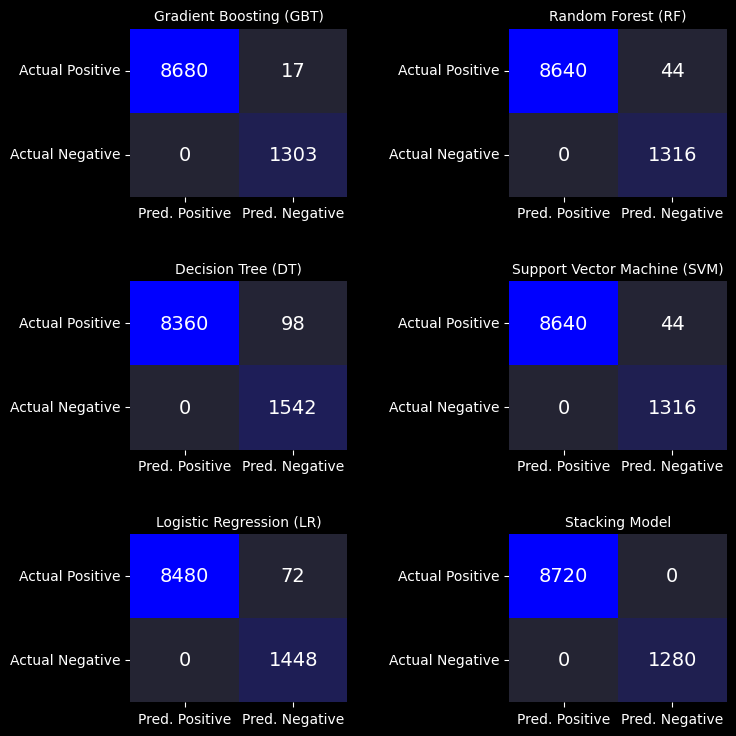

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Updated confusion matrix data for models including Stacking Model
confusion_data = {
    "Gradient Boosting (GBT)": {"TP": 8680, "FP": 17, "FN": 0, "TN": 1303},
    "Random Forest (RF)": {"TP": 8640, "FP": 44, "FN": 0, "TN": 1316},
    "Decision Tree (DT)": {"TP": 8360, "FP": 98, "FN": 0, "TN": 1542},
    "Support Vector Machine (SVM)": {"TP": 8640, "FP": 44, "FN": 0, "TN": 1316},
    "Logistic Regression (LR)": {"TP": 8480, "FP": 72, "FN": 0, "TN": 1448},
    "Stacking Model": {"TP": 8720, "FP": 0, "FN": 0, "TN": 1280},
}

# Convert data into a DataFrame
confusion_df = pd.DataFrame(confusion_data).T

# Plot settings
fig, axes = plt.subplots(3, 2, figsize=(8, 8))
axes = axes.flatten()

# Custom colormap (dark color for better visibility of white text)
colors = sns.dark_palette("blue", as_cmap=True)

# Create heatmaps for each model
for i, (model, matrix) in enumerate(confusion_data.items()):
    data = [[matrix["TP"], matrix["FP"]], [matrix["FN"], matrix["TN"]]]
    sns.heatmap(
        data, annot=True, fmt="d", cmap=colors, cbar=False, ax=axes[i],
        xticklabels=["Pred. Positive", "Pred. Negative"],
        yticklabels=["Actual Positive", "Actual Negative"],
        annot_kws={"size": 14, "color": "white"}  # Adjust text size and color in annotations
    )
    axes[i].set_title(model, fontsize=10, color="white")
    axes[i].tick_params(axis='both', labelsize=10, colors="white")

# Remove unused subplots if fewer than grid size
for j in range(len(confusion_data), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
fig.patch.set_facecolor('black')  # Set background color to black
plt.tight_layout(pad=3)  # Add padding for better spacing
plt.show()


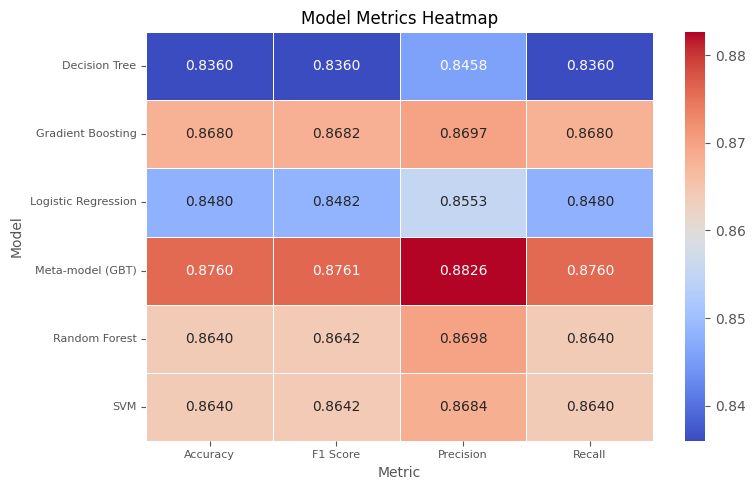

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data for the models and their metrics
data = {
    "Model": [
        "SVM", "Logistic Regression", "Decision Tree", "Random Forest",
        "Gradient Boosting", "Meta-model (GBT)"
    ],
    "Accuracy": [0.864, 0.848, 0.836, 0.864, 0.868, 0.876],
    "Precision": [0.8684, 0.8553, 0.8458, 0.8698, 0.8697, 0.8826],
    "Recall": [0.864, 0.848, 0.836, 0.864, 0.868, 0.876],
    "F1 Score": [0.8642, 0.8482, 0.8360, 0.8642, 0.8682, 0.8761]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars="Model", var_name="Metric", value_name="Value")

# Pivot the DataFrame for heatmap input
df_pivoted = df_melted.pivot(index="Model", columns="Metric", values="Value")

# Create the heatmap
plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(
    df_pivoted,
    annot=True,
    fmt=".4f",
    cmap="coolwarm",
    linewidths=0.5
)

# Customize the heatmap
plt.title("Model Metrics Heatmap", fontsize=12)
plt.xlabel("Metric", fontsize=10)
plt.ylabel("Model", fontsize=10)
plt.xticks(fontsize=18)
plt.yticks(fontsize=10, rotation=0)

# Show the heatmap
plt.tight_layout()
plt.show()
